In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [3]:
# low_memory=False - 여러 데이터 형이 있어서 추가
raw = pd.read_csv(r"../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [4]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [6]:
# axis = 0 - row, axis = 1 - col
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [7]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


## Q1 What is your age (# years)?

In [8]:
question["Q1"]

'What is your age (# years)?'

In [11]:
# show rate
answer['Q1'].value_counts(normalize=True)

25-29    0.200190
22-24    0.188960
18-21    0.173138
30-34    0.140297
35-39    0.099371
40-44    0.069724
45-49    0.049311
50-54    0.034837
55-59    0.020513
60-69    0.019864
70+      0.003793
Name: Q1, dtype: float64

In [12]:
# sort by index
answer['Q1'].value_counts().sort_index()

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

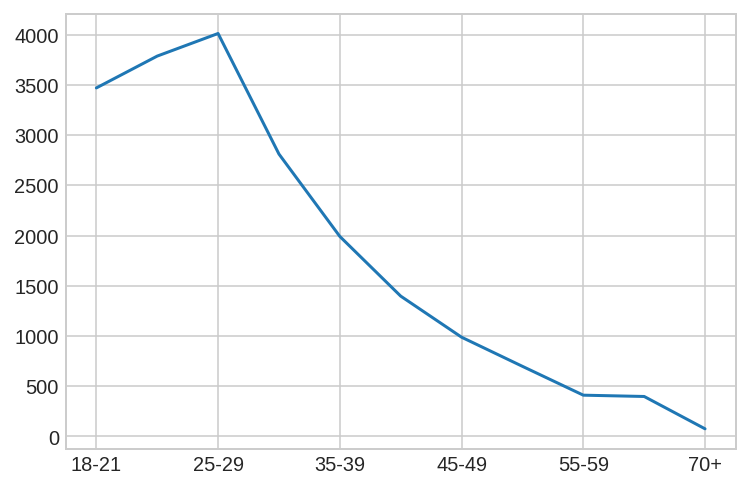

In [13]:
answer['Q1'].value_counts().sort_index().plot()

Text(0.5, 1.0, 'What is your age (# years)?')

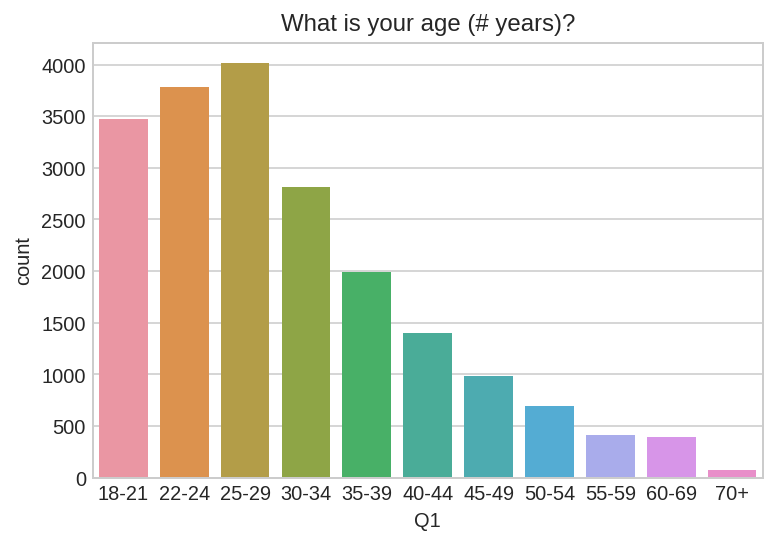

In [16]:
#sns.countplot(data=answer, x="Q1")
sns.countplot(data=answer.sort_values("Q1"), x="Q1").set_title(question['Q1'])

Text(0.5, 1.0, 'What is your age (# years)?')

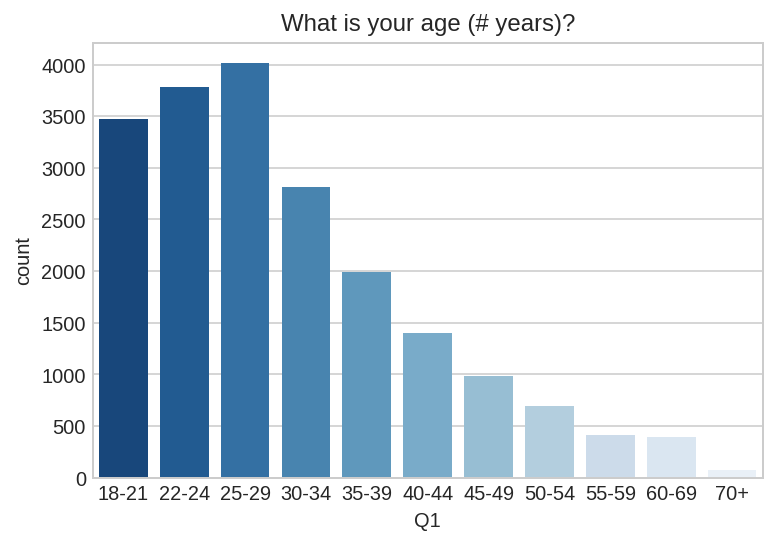

In [9]:
# '_r' 진한 색 순으로 보여짐
Q1 = answer['Q1'].value_counts().sort_index()
sns.countplot(data=answer.sort_values("Q1"), x="Q1", 
              palette="Blues_r").set_title(question["Q1"])

## Q2 What is your gender? - Selected Choice

In [17]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

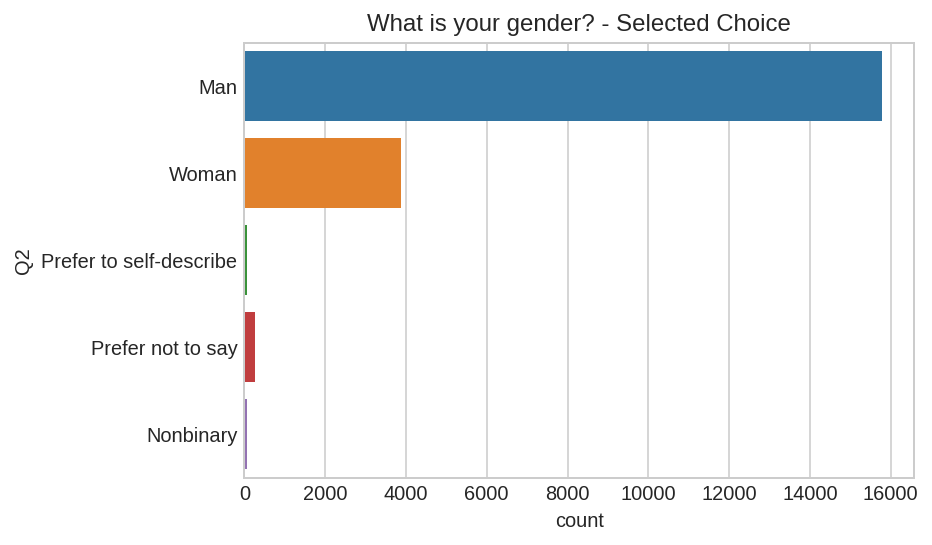

In [18]:
sns.countplot(data=answer, 
              y=question_no).set_title(question[question_no])

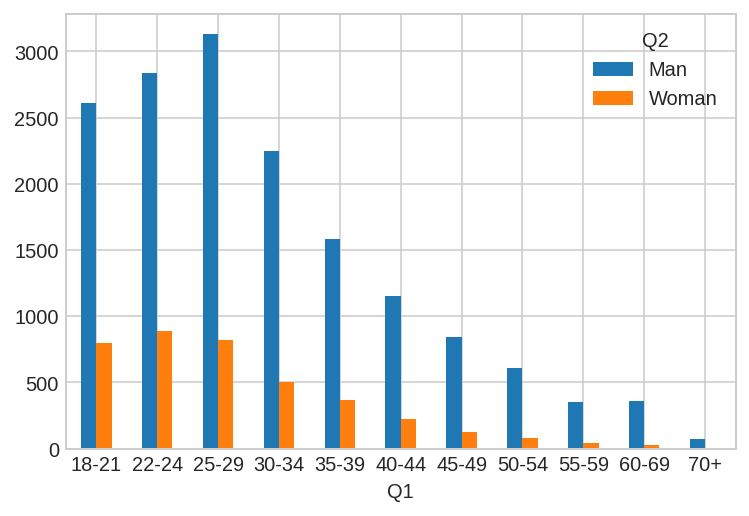

In [19]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man", "Woman"]].plot.bar(rot=0)

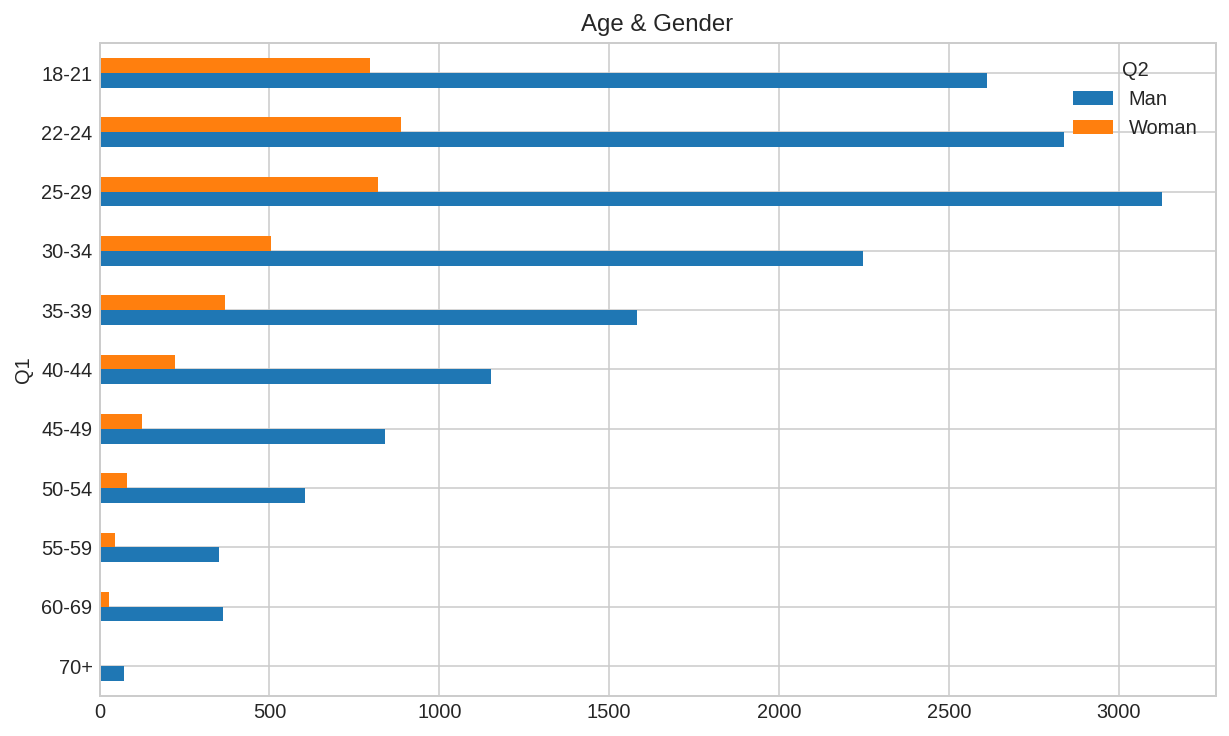

In [20]:
q1q2[["Man", "Woman"]].sort_index(ascending=False).plot.barh(figsize=(10, 6), title="Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

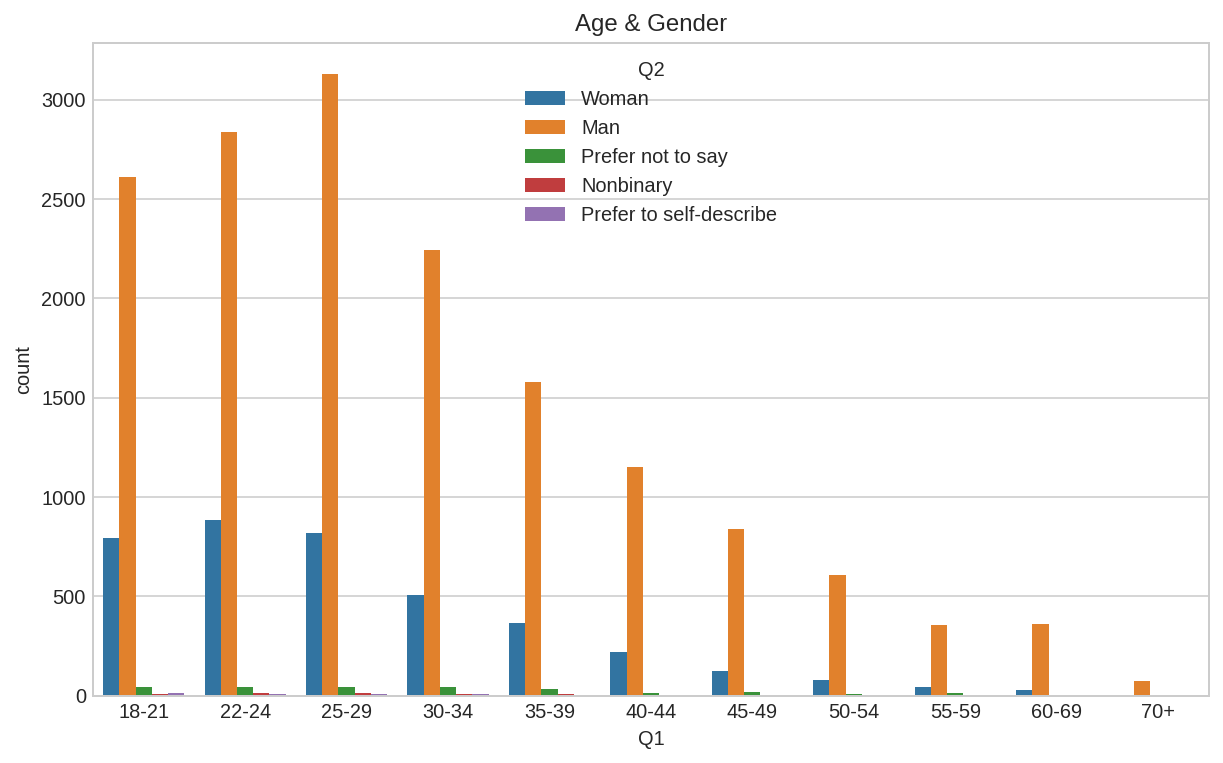

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

## Q3 In which country do you currently reside?

### 📊define show_countplot_by_qno

In [22]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
    """
    qno : question_no, ex) Q12
    fsize : figsize default (10, 6)
    order : optional order list, default value_counts().index
    """
    if not order :
        order = answer[qno].value_counts().index
        
    plt.figure(figsize=fsize)
    sns.countplot(data=answer, 
                  y=qno,
                  order=order,
                  palette="Blues_r"
                 ).set_title(question[qno])

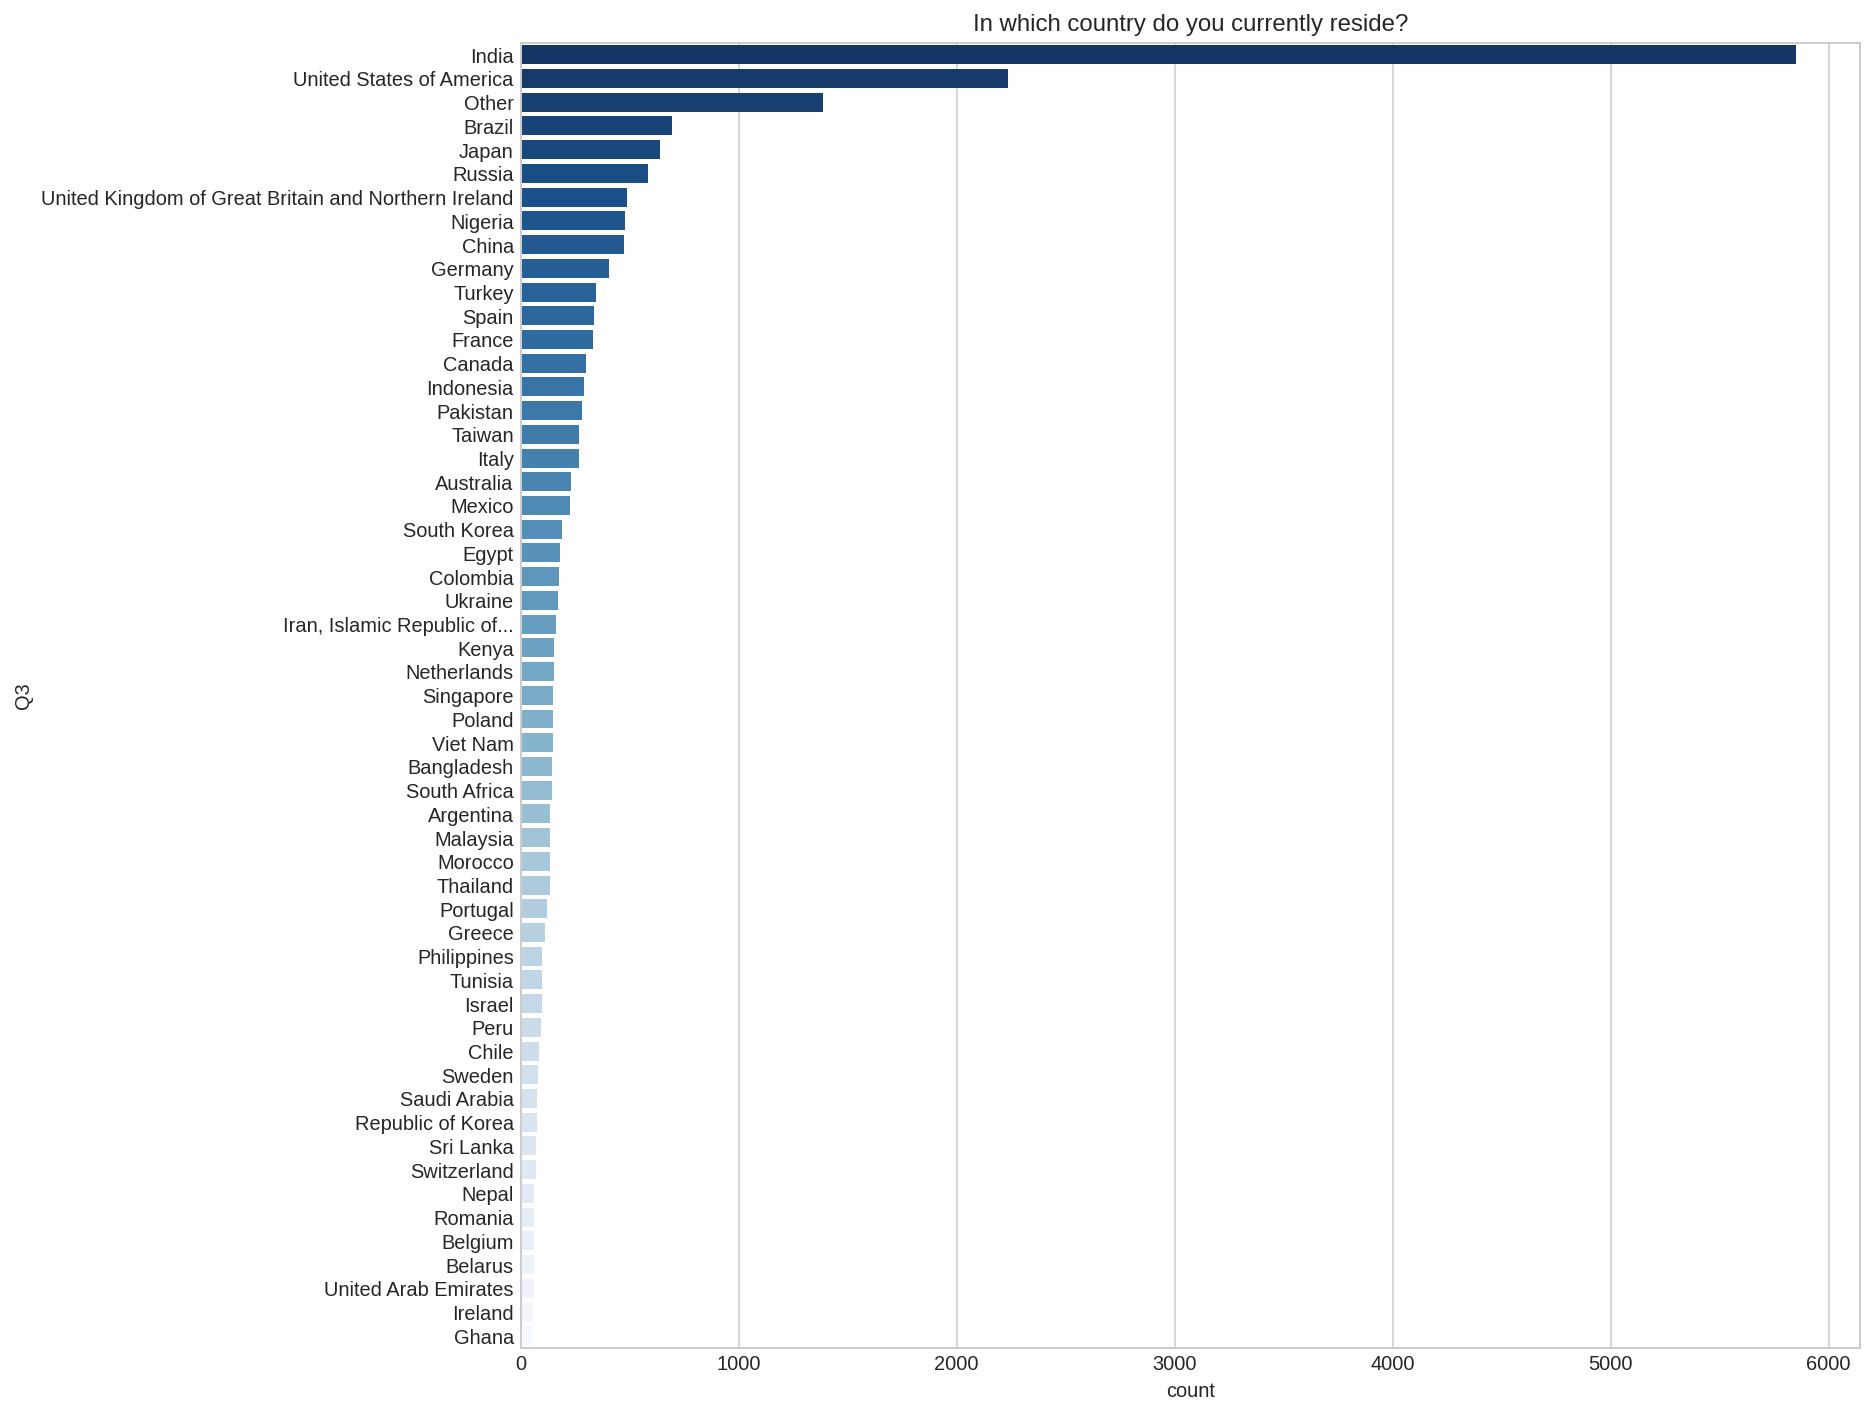

In [23]:
show_countplot_by_qno("Q3", fsize=(12, 12))

## Q4 🎓 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

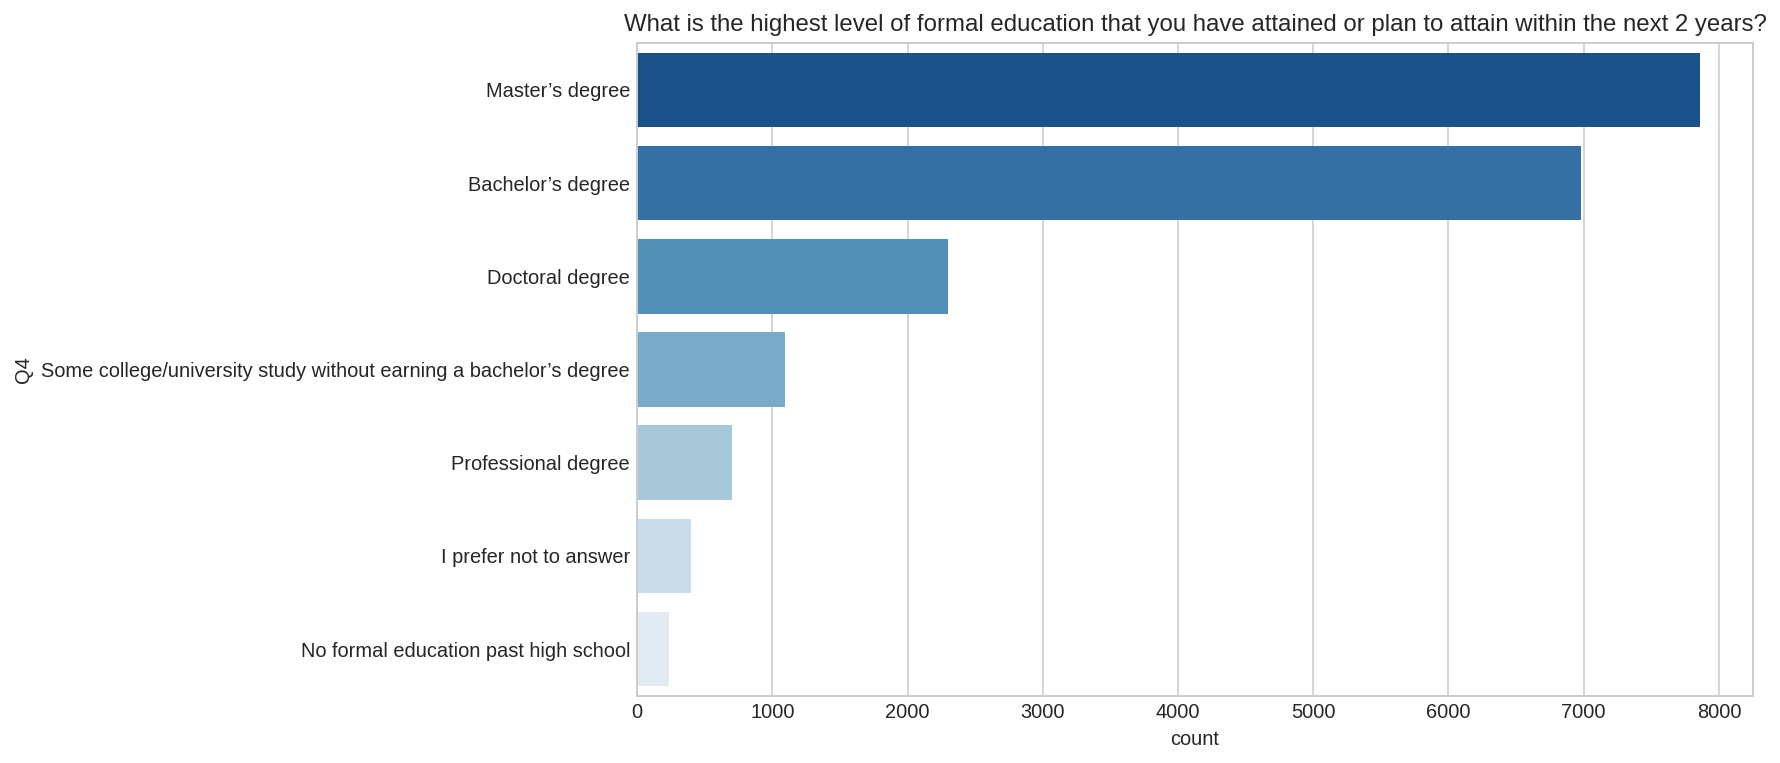

In [24]:
show_countplot_by_qno("Q4")

## Q5 Select the title most similar to your current role (or most recent title if retired):

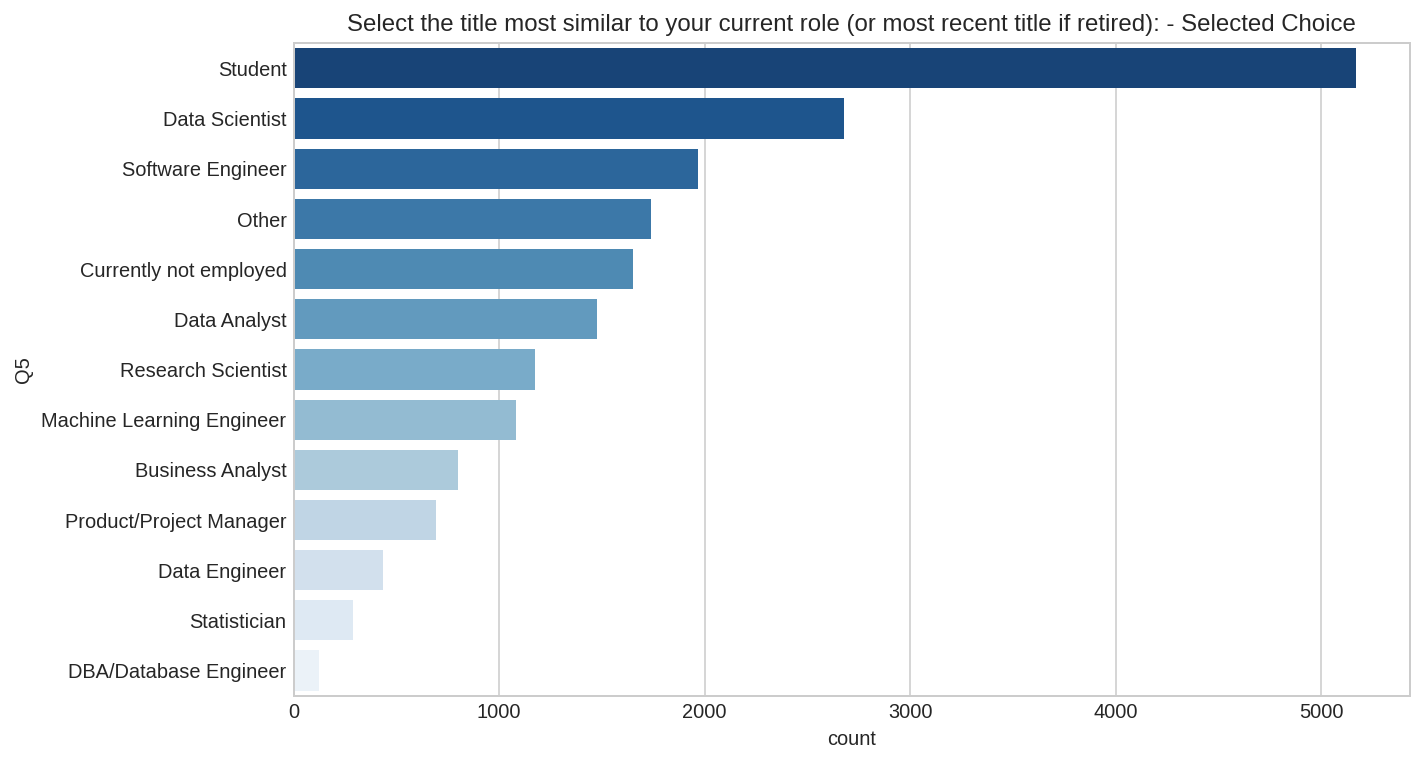

In [25]:
show_countplot_by_qno("Q5")

## Q6 For how many years have you been writing code and/or programming?

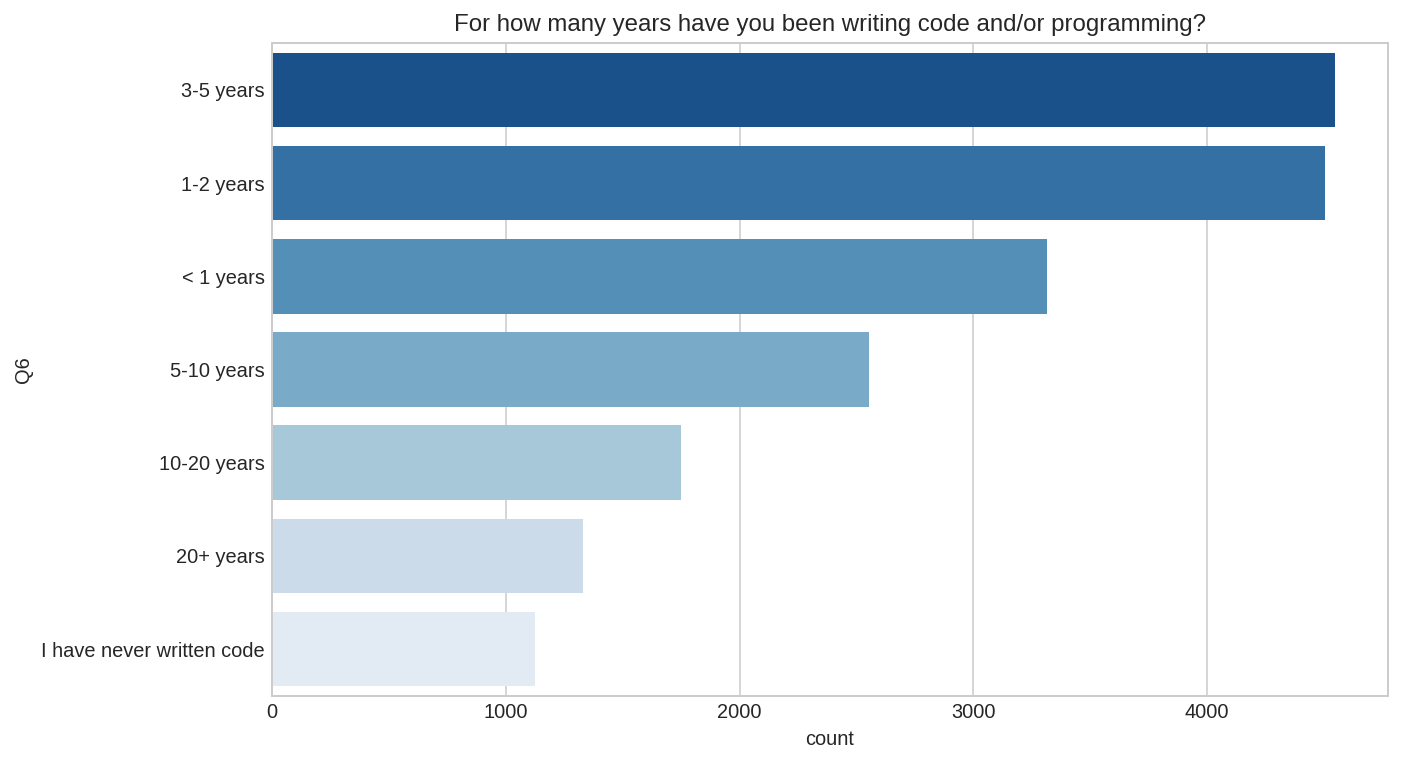

In [26]:
show_countplot_by_qno("Q6")

In [27]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

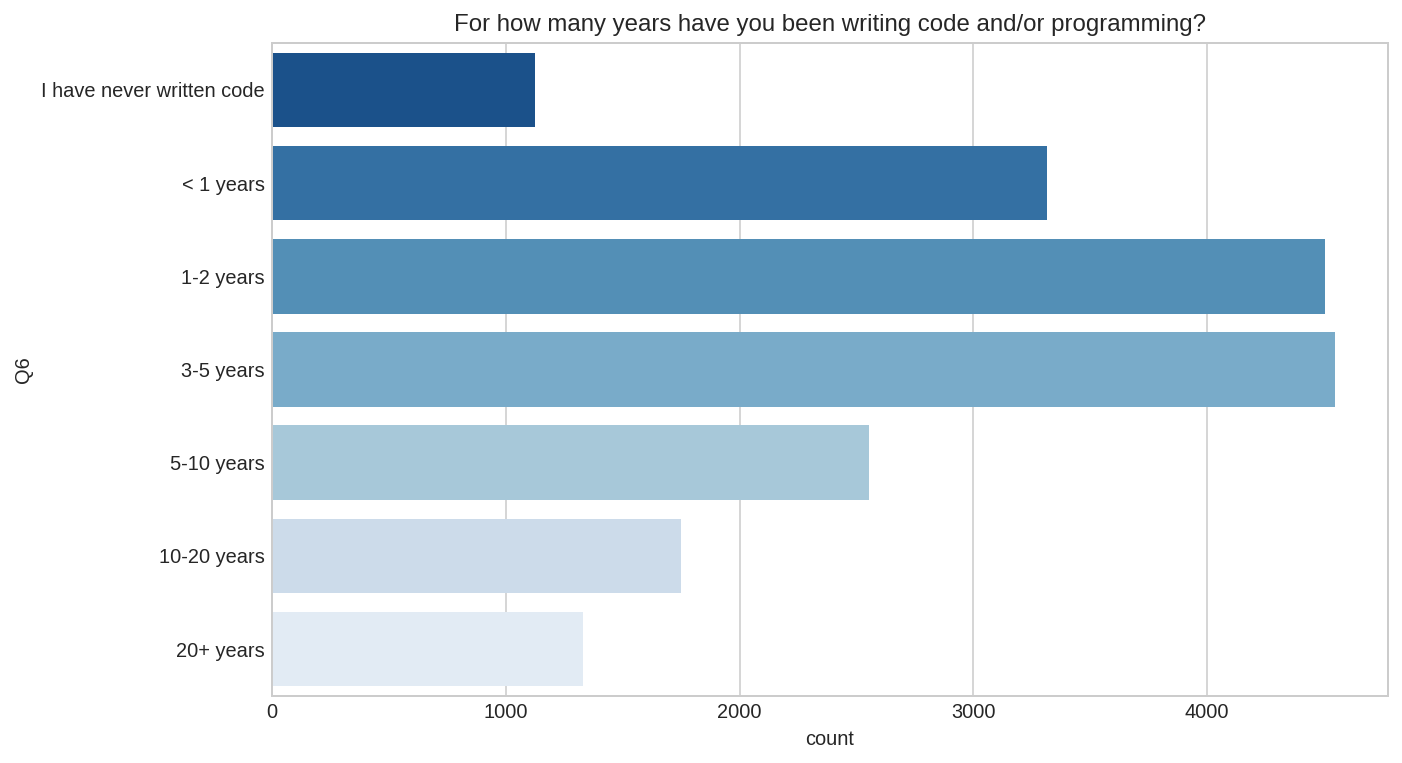

In [28]:
show_countplot_by_qno("Q6", order=q6_cols)

## Q7 What programming languages do you use on a regular basis? (Select all that apply)

### 🐼 pandas filter & describe 🗂

In [33]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [34]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,15530,4277,7535,3315,3827,3367,2995,262,198,1776,2217,206,1945


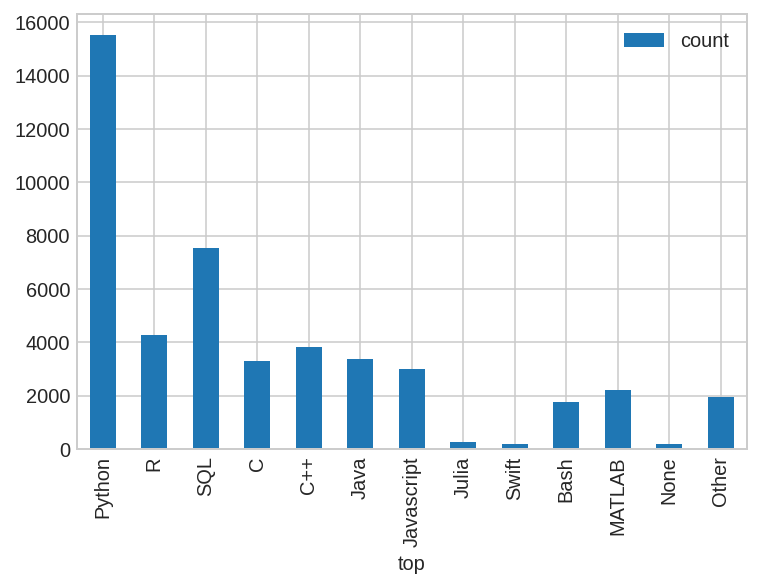

In [43]:
answer_Q7_desc = answer_Q7.describe()
# '.T' transpose. 컬럼으로 가게 된다.
answer_Q7_desc.loc[["top", "count"]].T.set_index("top").plot.bar()

In [44]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

,count
top,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Other,1945


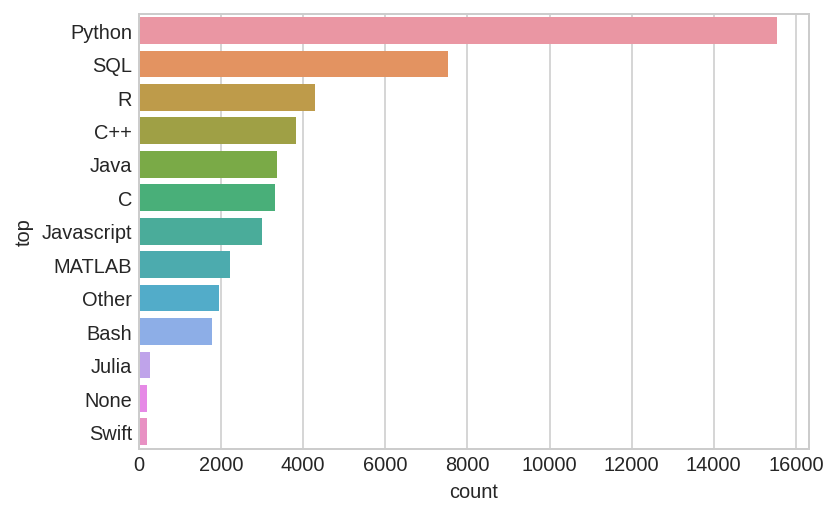

In [46]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count")

### 🗂 How to get title in multiple choice question

In [47]:
q7_title = question.filter(regex="Q7")[0].split("-")[0]

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

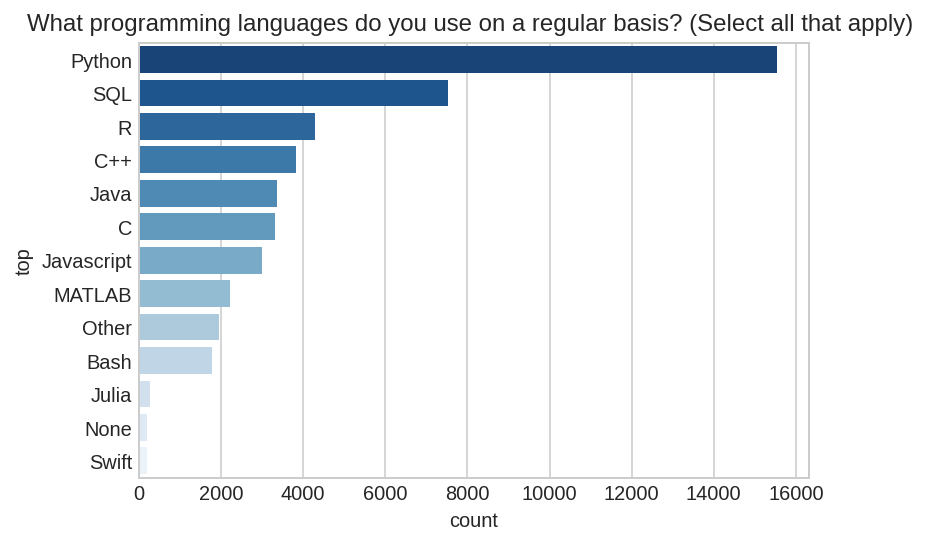

In [48]:
sns.barplot(data=answer_Q7_count, 
            y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

### 🏷 define get_question_title function

In [54]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [51]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = question.filter(regex=qno)[0].split("-")[0]
        return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

### 🗂 define get_multiple_choice_answer

In [52]:
def get_multiple_choice_answer_by_qno(qno):
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
    answer_count = answer_count.sort_values(by="count", ascending=False)
    return answer_count

In [53]:
get_multiple_choice_answer_by_qno("Q9")

,count
top,
"Jupyter (JupyterLab, Jupyter Notebooks, etc)",11211
Visual Studio Code (VSCode),5873
PyCharm,5099
RStudio,3826
Spyder,3290
Notepad++,3132
Sublime Text,2452
Visual Studio,2445
MATLAB,1604


### 📊 define show_multiple_choice_bar_plot_by_qno function

In [55]:
def show_multiple_choice_bar_plot_by_qno(qno):
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)
     
    plt.figure(figsize=(10, 6))
    sns.barplot(data=multiple_choice_answer,
                y=multiple_choice_answer.index, 
                x="count", 
                palette="Blues_r").set_title(get_question_title_by_qno(qno))

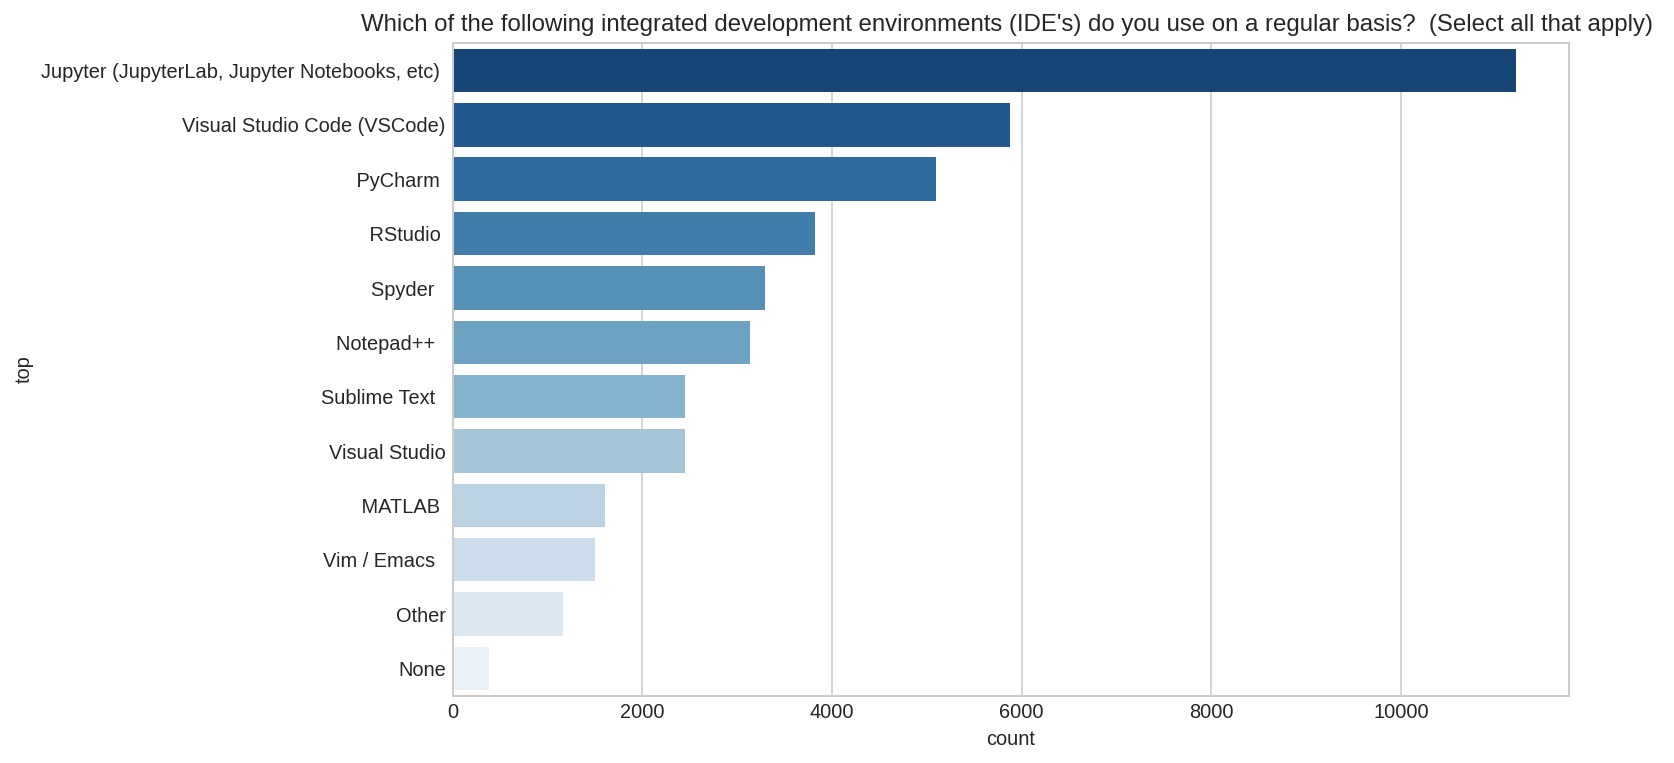

In [57]:
show_multiple_choice_bar_plot_by_qno("Q9")

In [66]:
answer["Q2"].head()

1    Man
2    Man
3    Man
4    Man
5    Man
Name: Q2, dtype: object

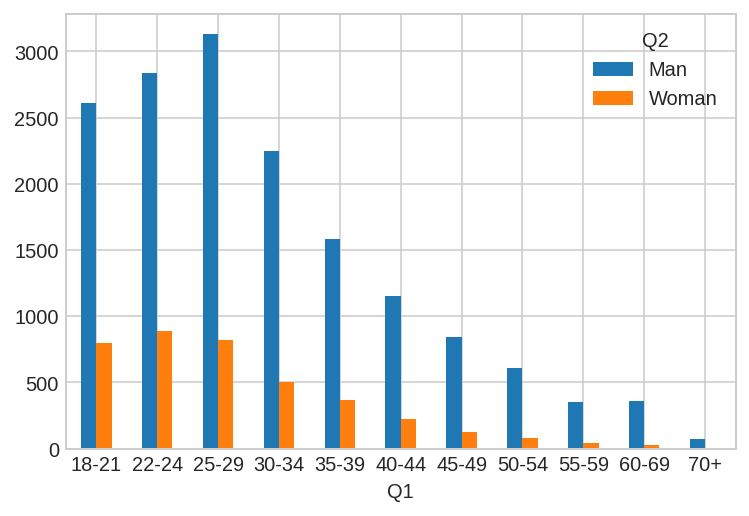

In [69]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man", "Woman"]].plot.bar(rot=0)

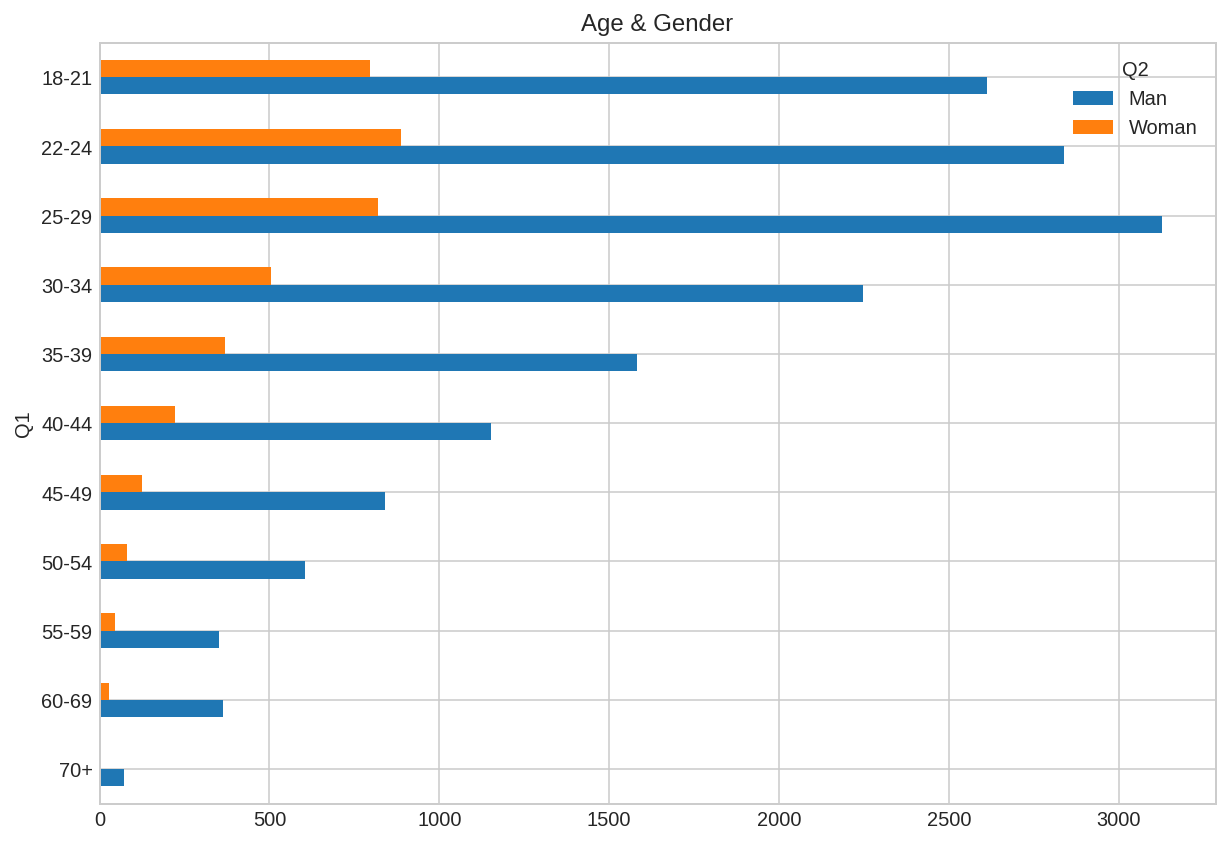

In [76]:
q1q2[["Man", "Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,7), title="Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

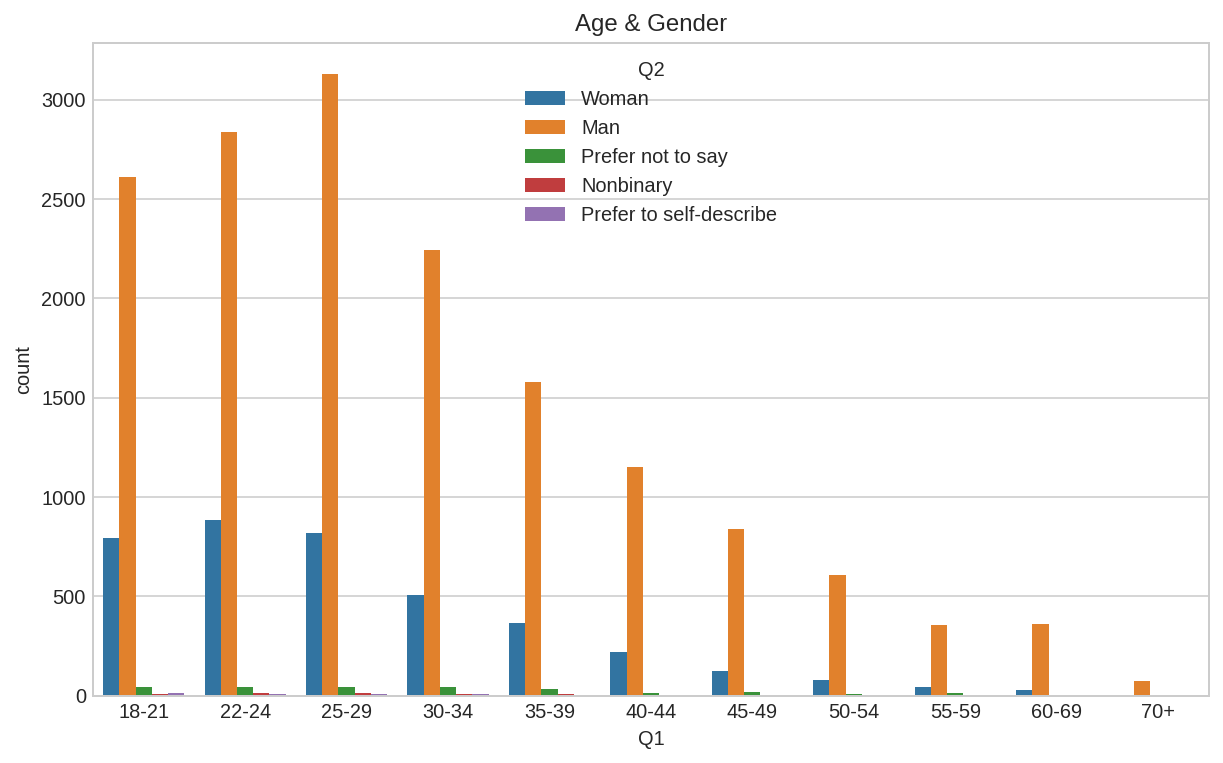

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

In [90]:
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()

In [91]:
# '$' - end, '^' - Start
q2q7 = answer.filter(regex="Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols
q2q7_count

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Q2,,,,,,,,,,,,,
Man,12530,3299,5940,2552,3063,2641,2487,238,171,1561,1679,149,1634
Nonbinary,41,14,20,8,10,1,6,1,2,10,7,0,7
Prefer not to say,182,48,97,36,43,42,41,5,4,31,28,6,31
Prefer to self-describe,41,8,18,12,13,9,12,2,1,10,6,0,7
Woman,2736,908,1460,707,698,674,449,16,20,164,497,51,266


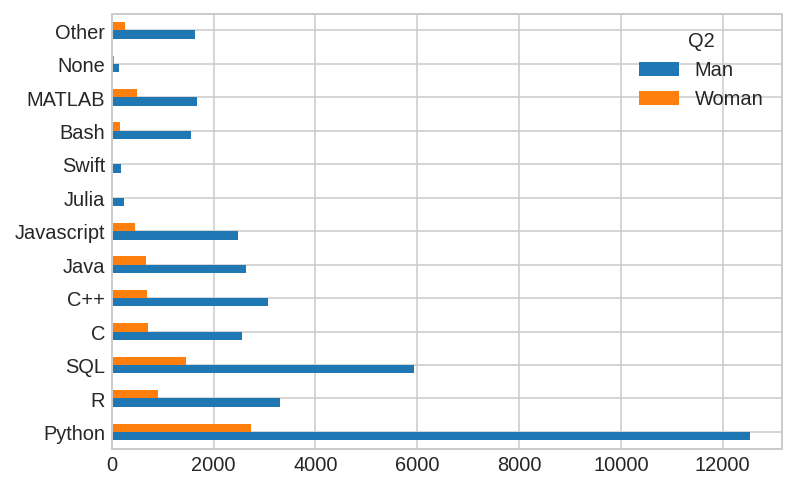

In [93]:
q2q7_count.loc[["Man", "Woman"]].T.plot.barh()

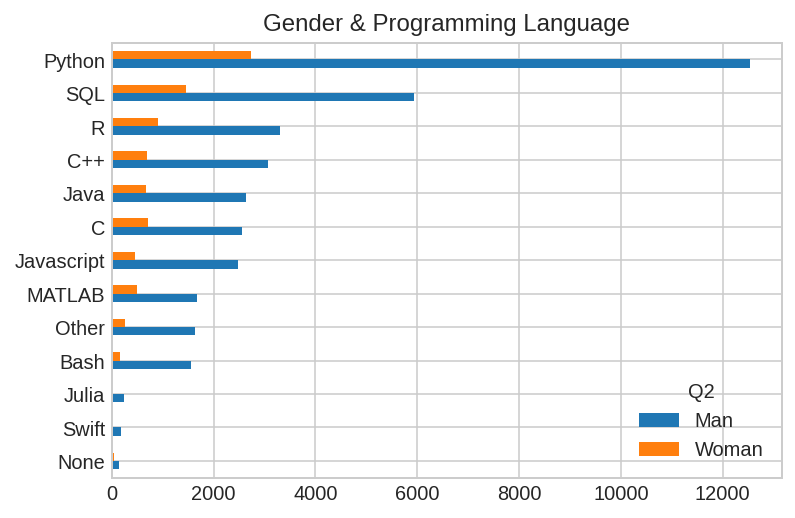

In [95]:
g = q2q7_count.loc[["Man", "Woman"]].T.sort_values("Man").plot.barh(title="Gender & Programming Language")

### define 📊 show_plot_by_qno 

In [ ]:
# show_countplot_by_qno("Q7")
# show_multiple_choice_bar_plot_by_qno("Q1")

In [96]:
question.index

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [97]:
def show_plot_by_qno(qno):
    if qno in question.index:
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)

## Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

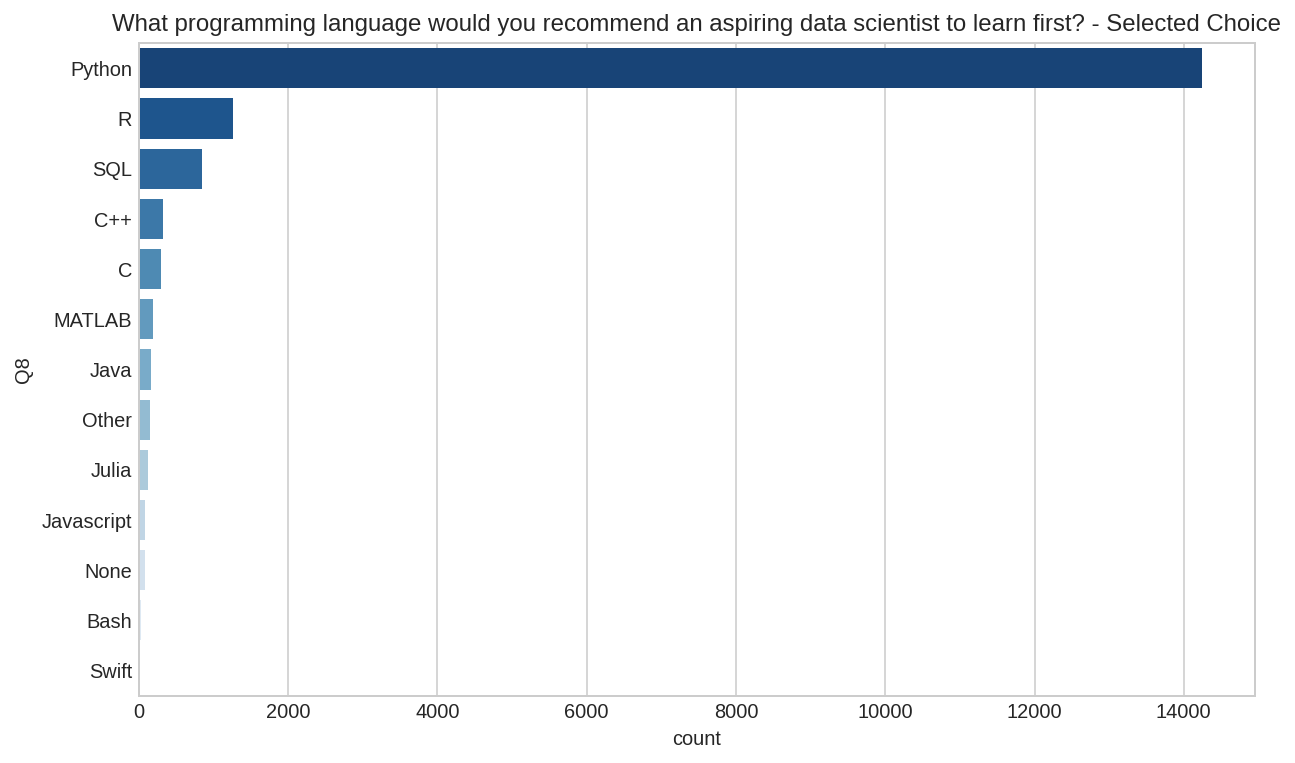

In [98]:
show_plot_by_qno("Q8")

## Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)

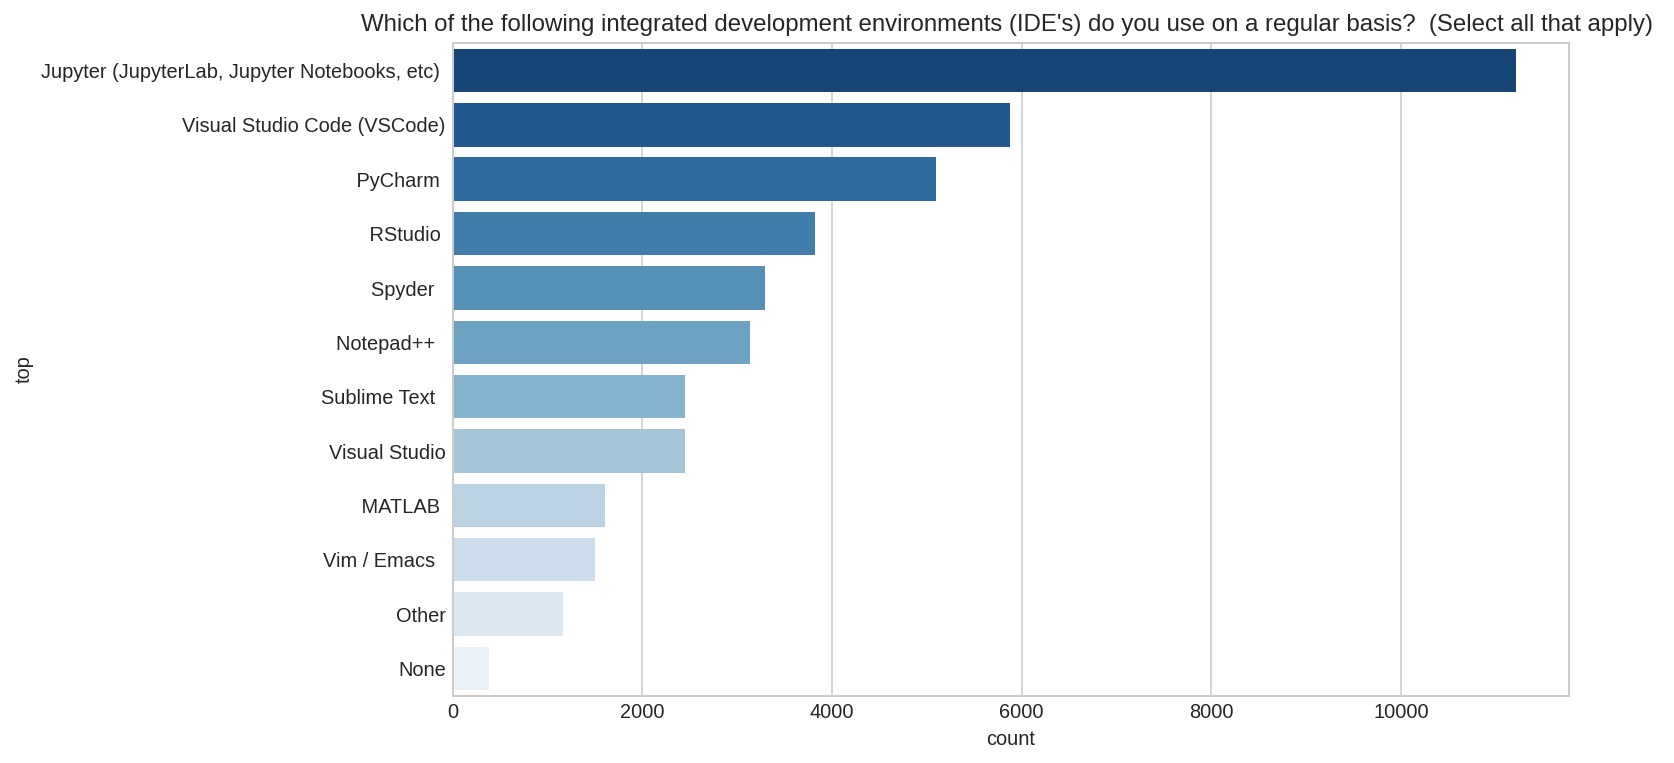

In [99]:
show_plot_by_qno("Q9")

## Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

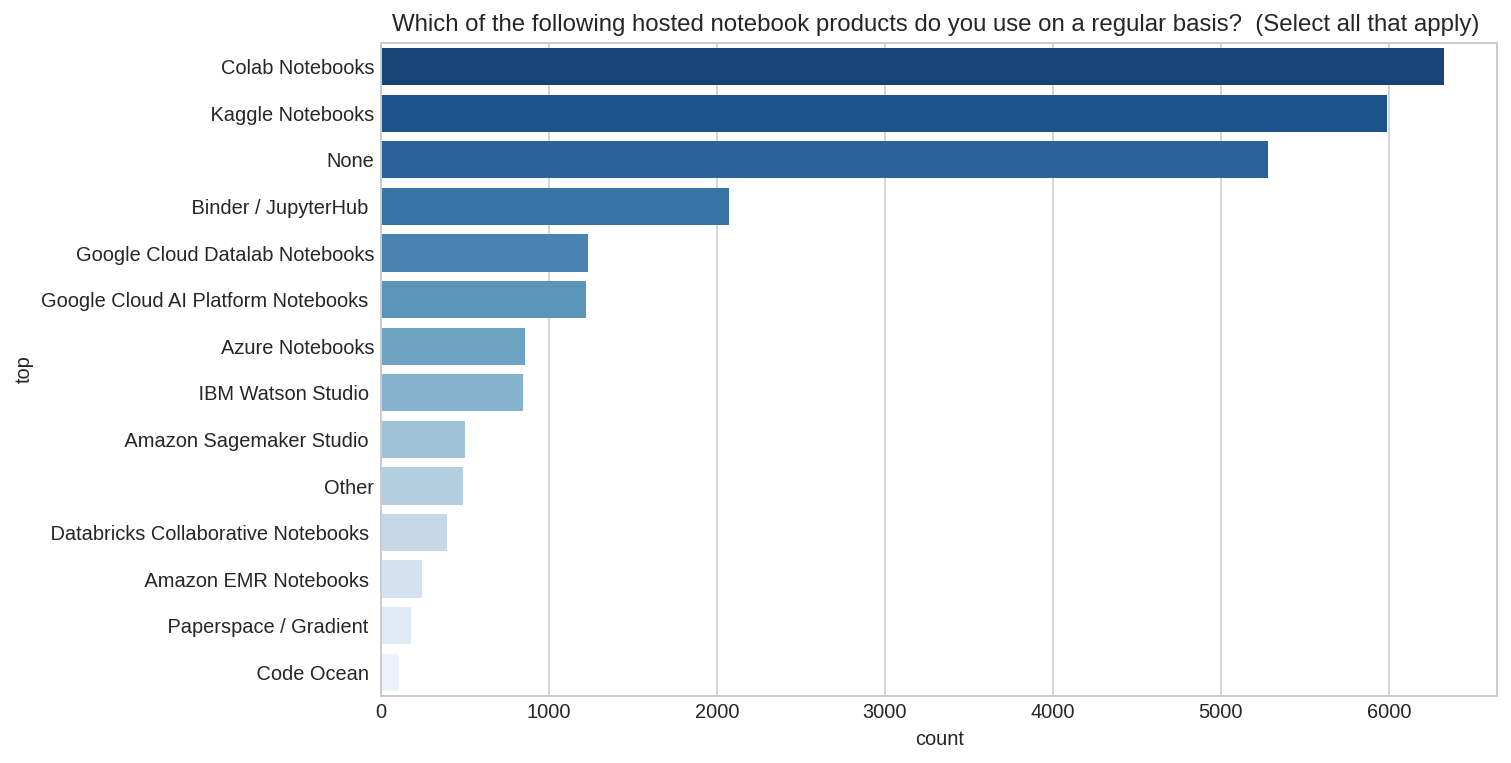

In [100]:
show_plot_by_qno("Q10")

## Q11 What type of computing platform do you use most often for your data science projects? - Selected Choice

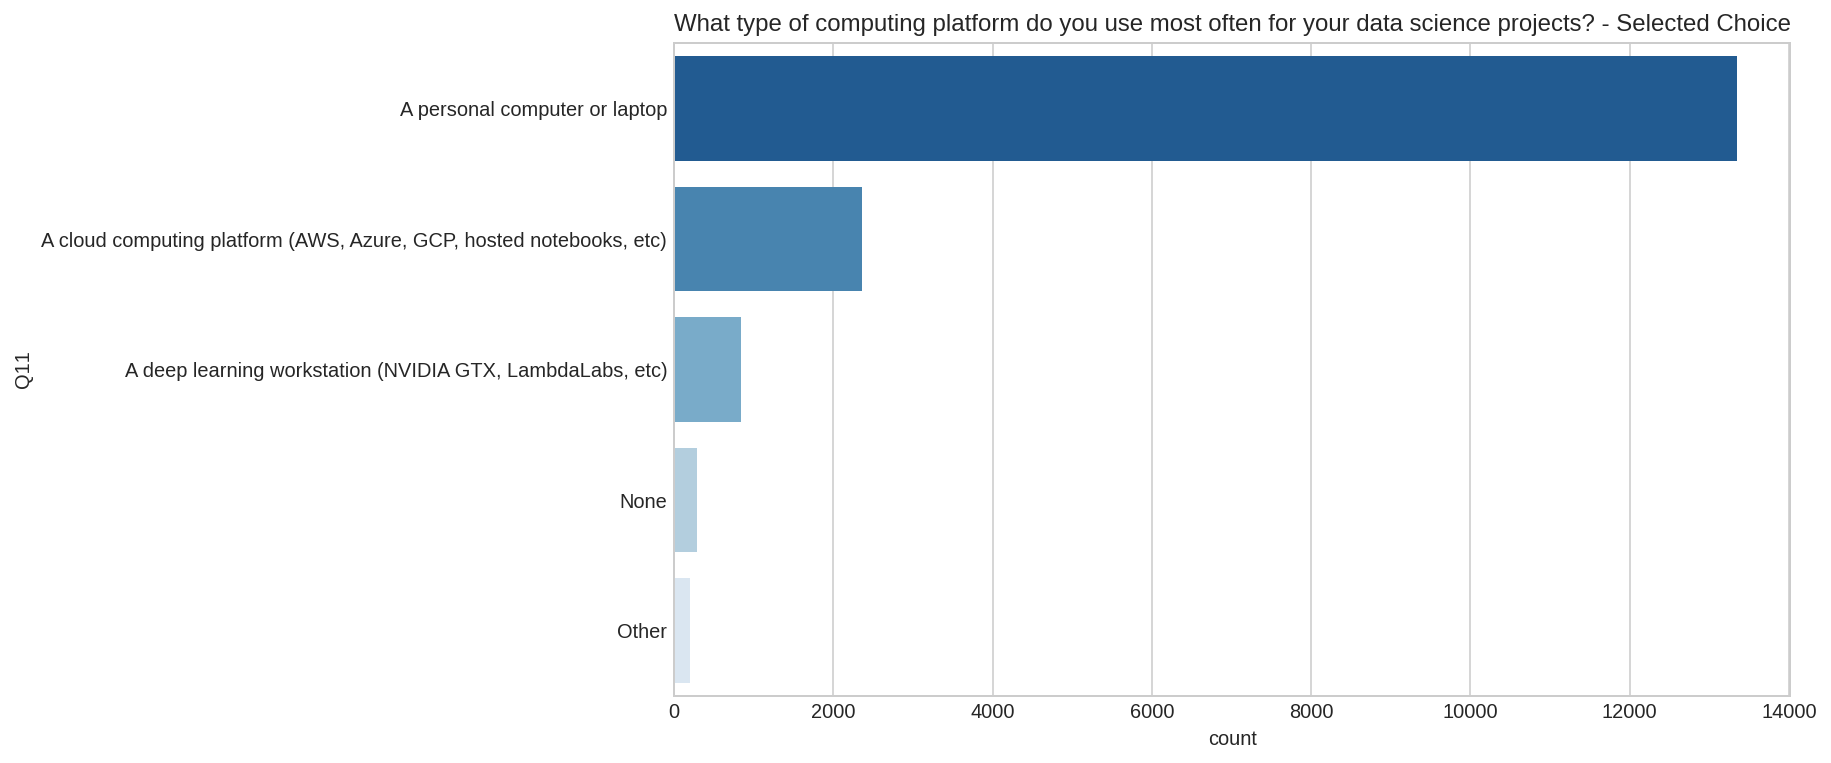

In [101]:
show_plot_by_qno("Q11")

## Q12 Which types of specialized hardware do you use on a regular basis?

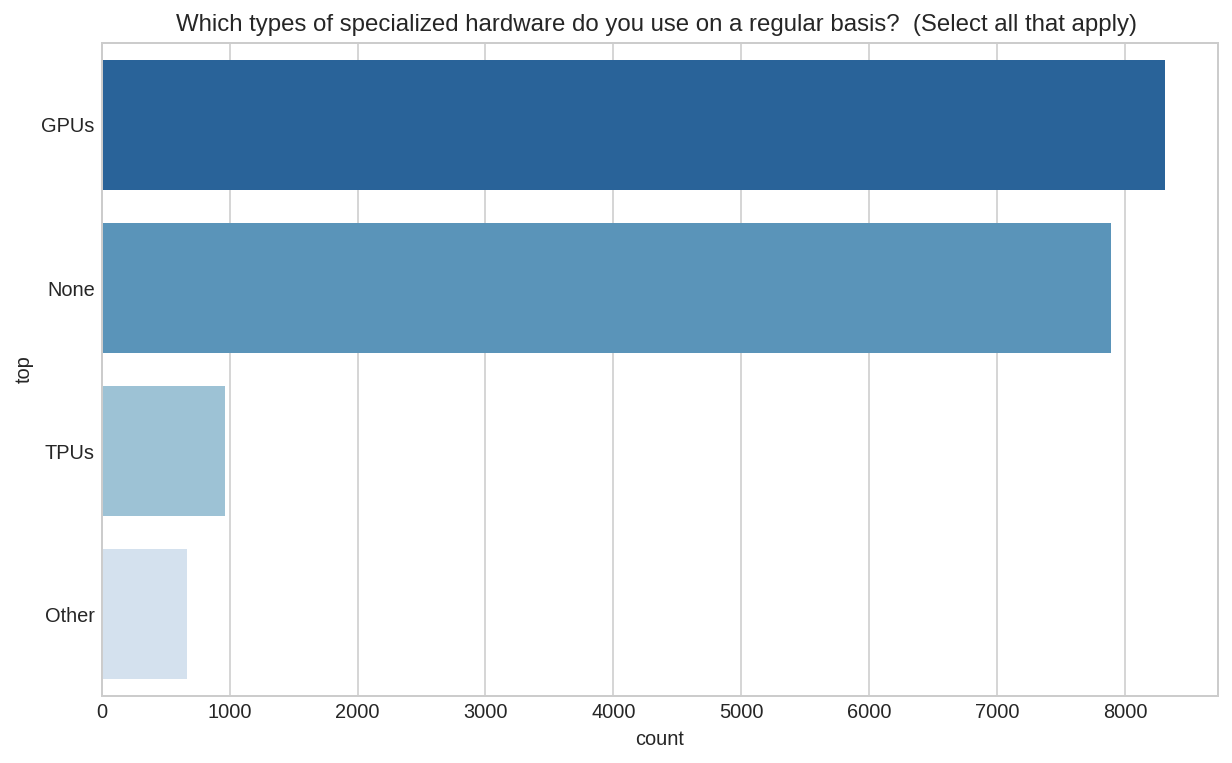

In [102]:
show_plot_by_qno("Q12")

## Q13 🧮 Approximately how many times have you used a TPU (tensor processing unit)?

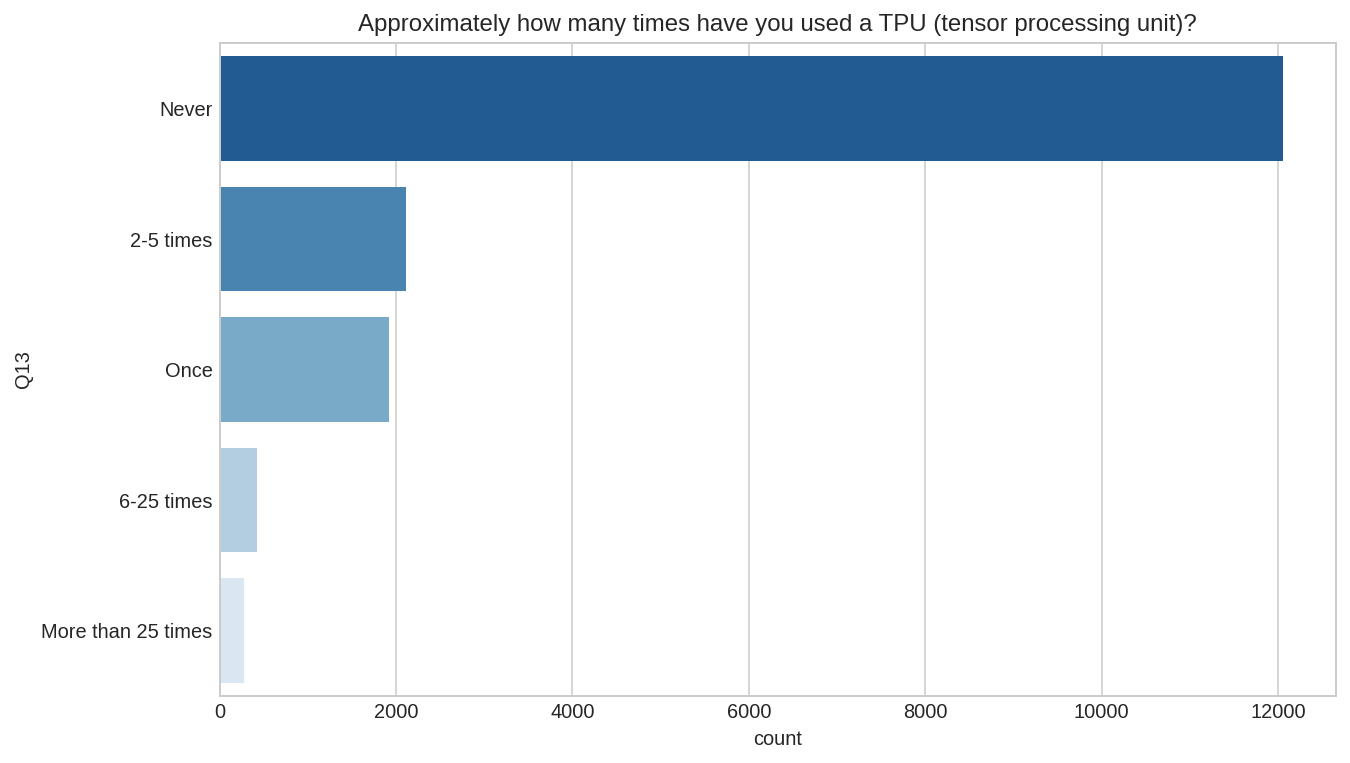

In [103]:
show_plot_by_qno("Q13")

## Q14 🎨 What data visualization libraries or tools do you use on a regular basis? (Select all that apply)

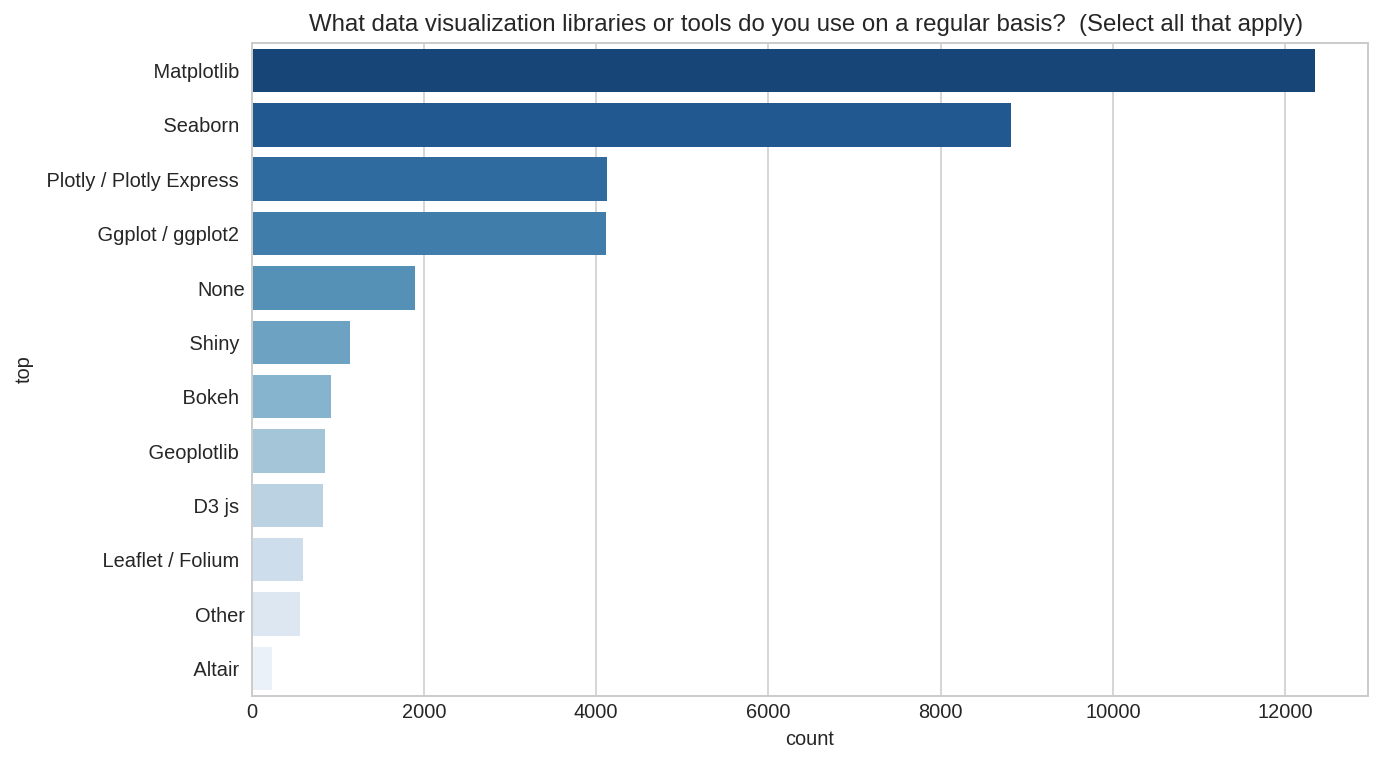

In [104]:
show_plot_by_qno("Q14")

## Q15 For how many years have you used machine learning methods?

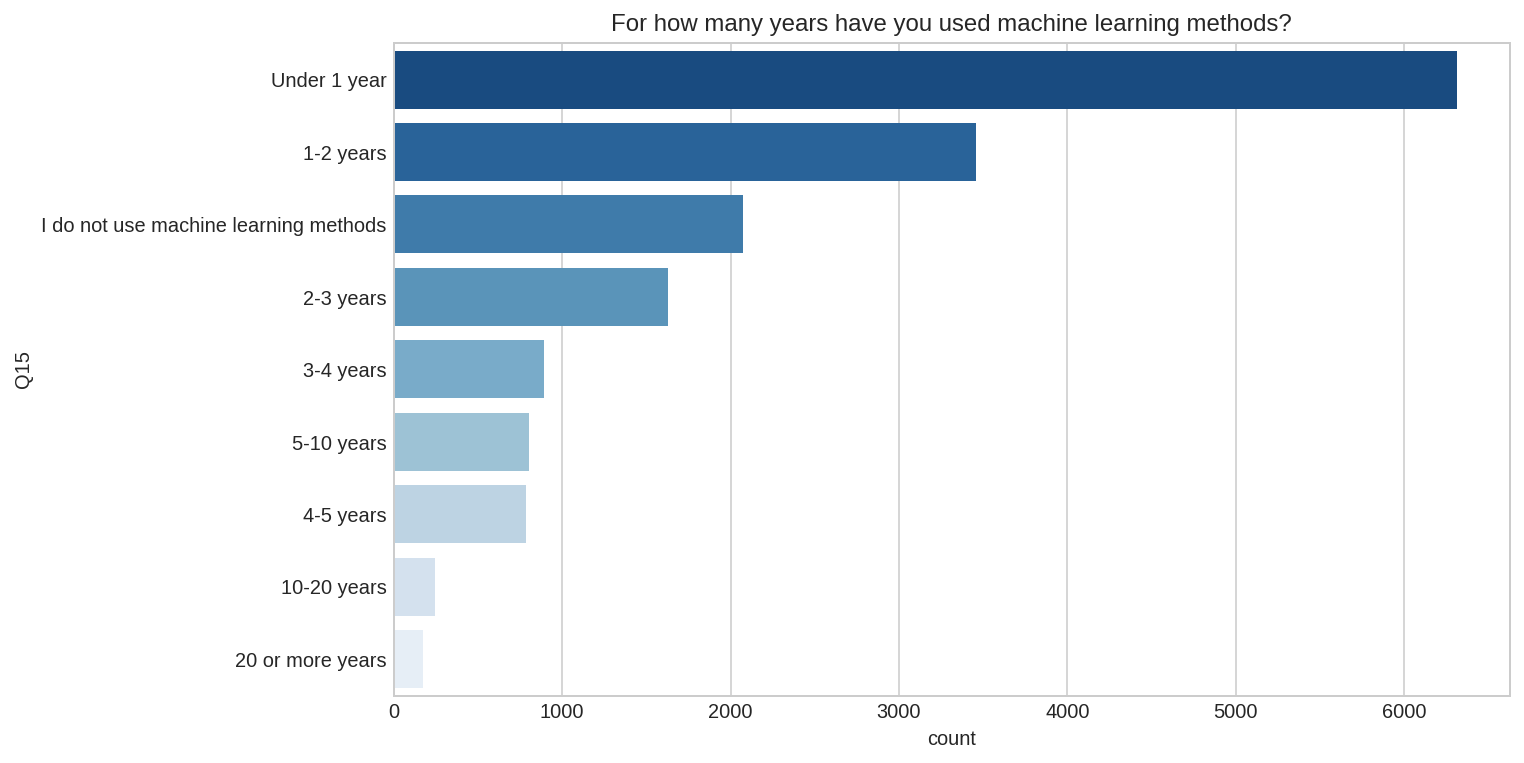

In [105]:
show_plot_by_qno("Q15")

## Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

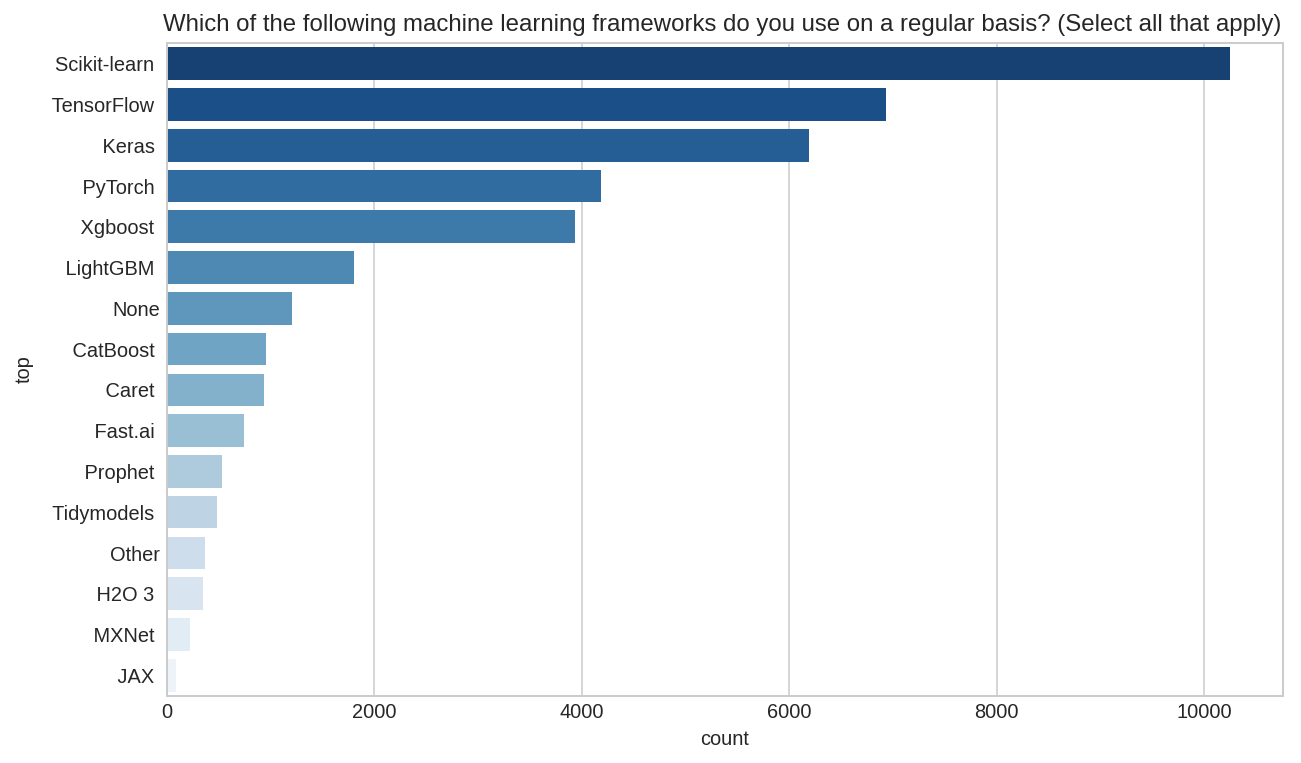

In [106]:
show_plot_by_qno("Q16")

## Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply):

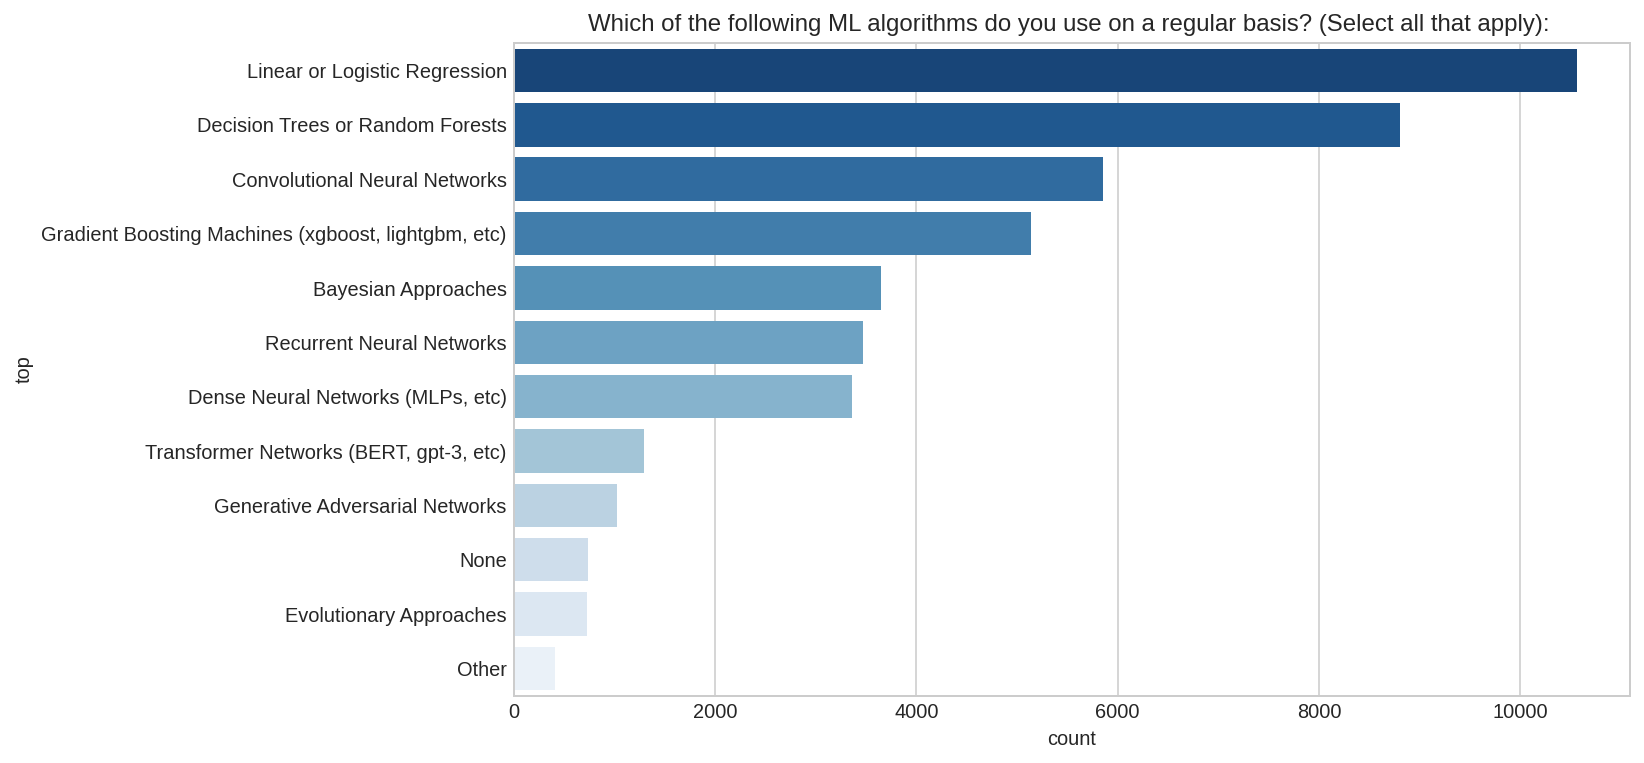

In [107]:
show_plot_by_qno("Q17")

## Q18 Which categories of computer vision methods do you use on a regular basis?  (Select all that apply)

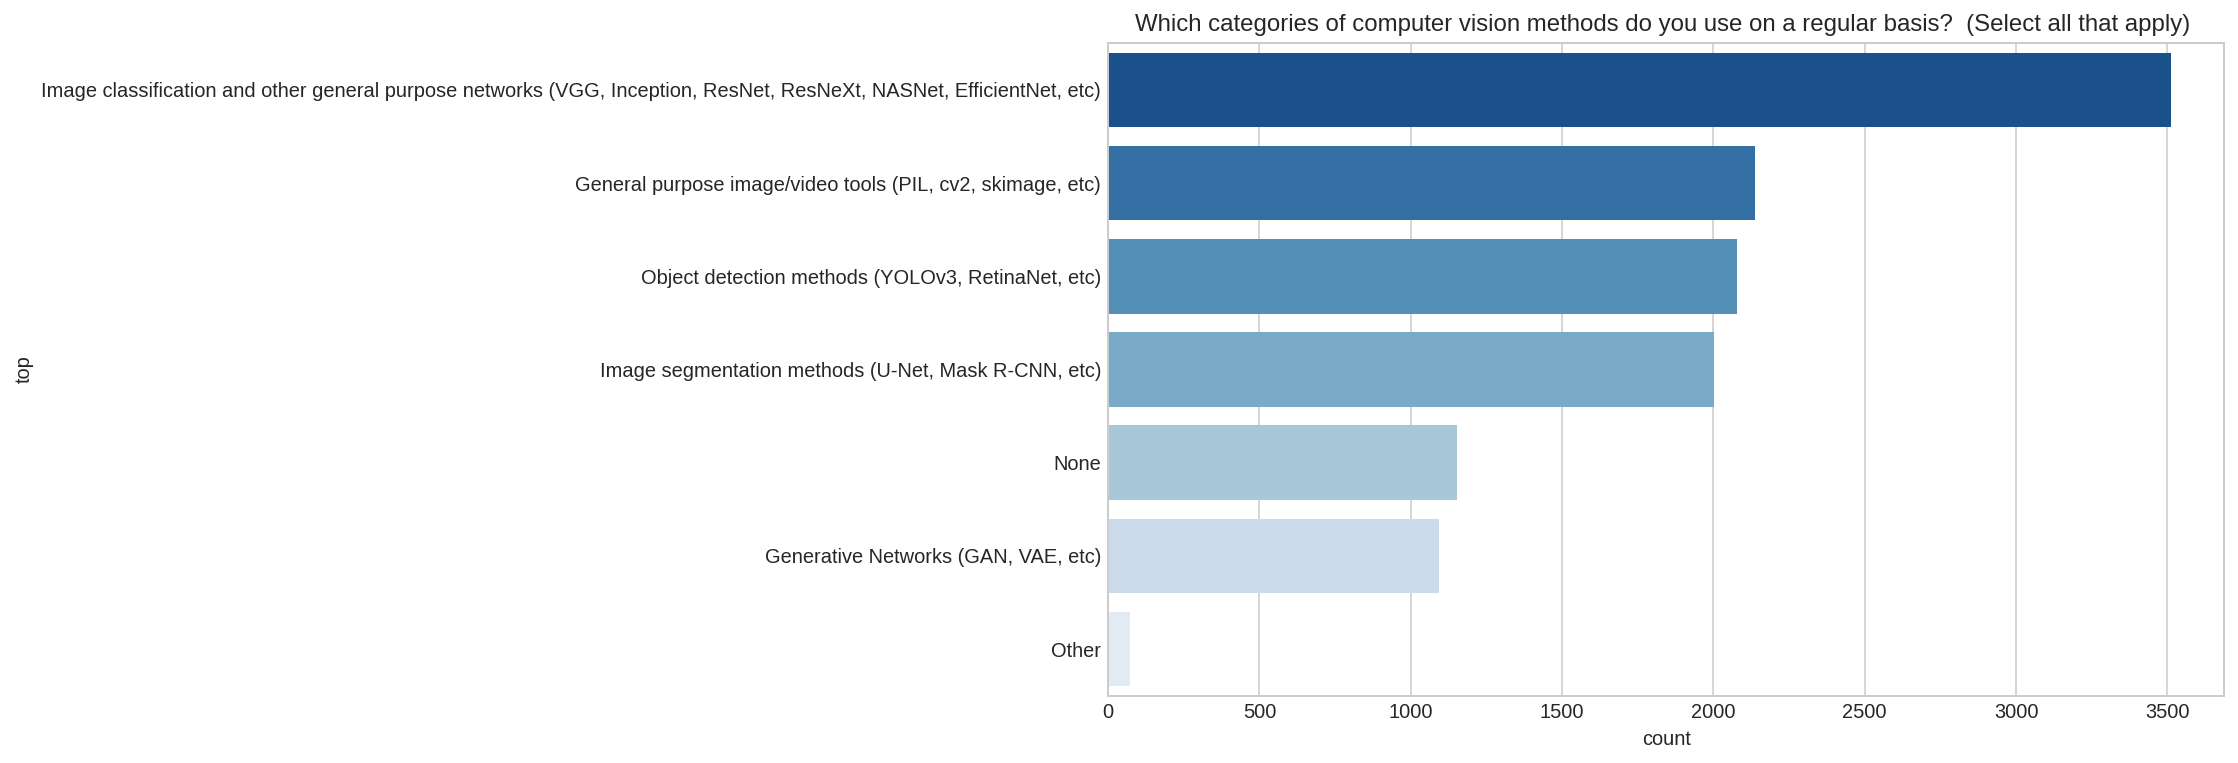

In [108]:
show_plot_by_qno("Q18")

## Q19 📚 Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)

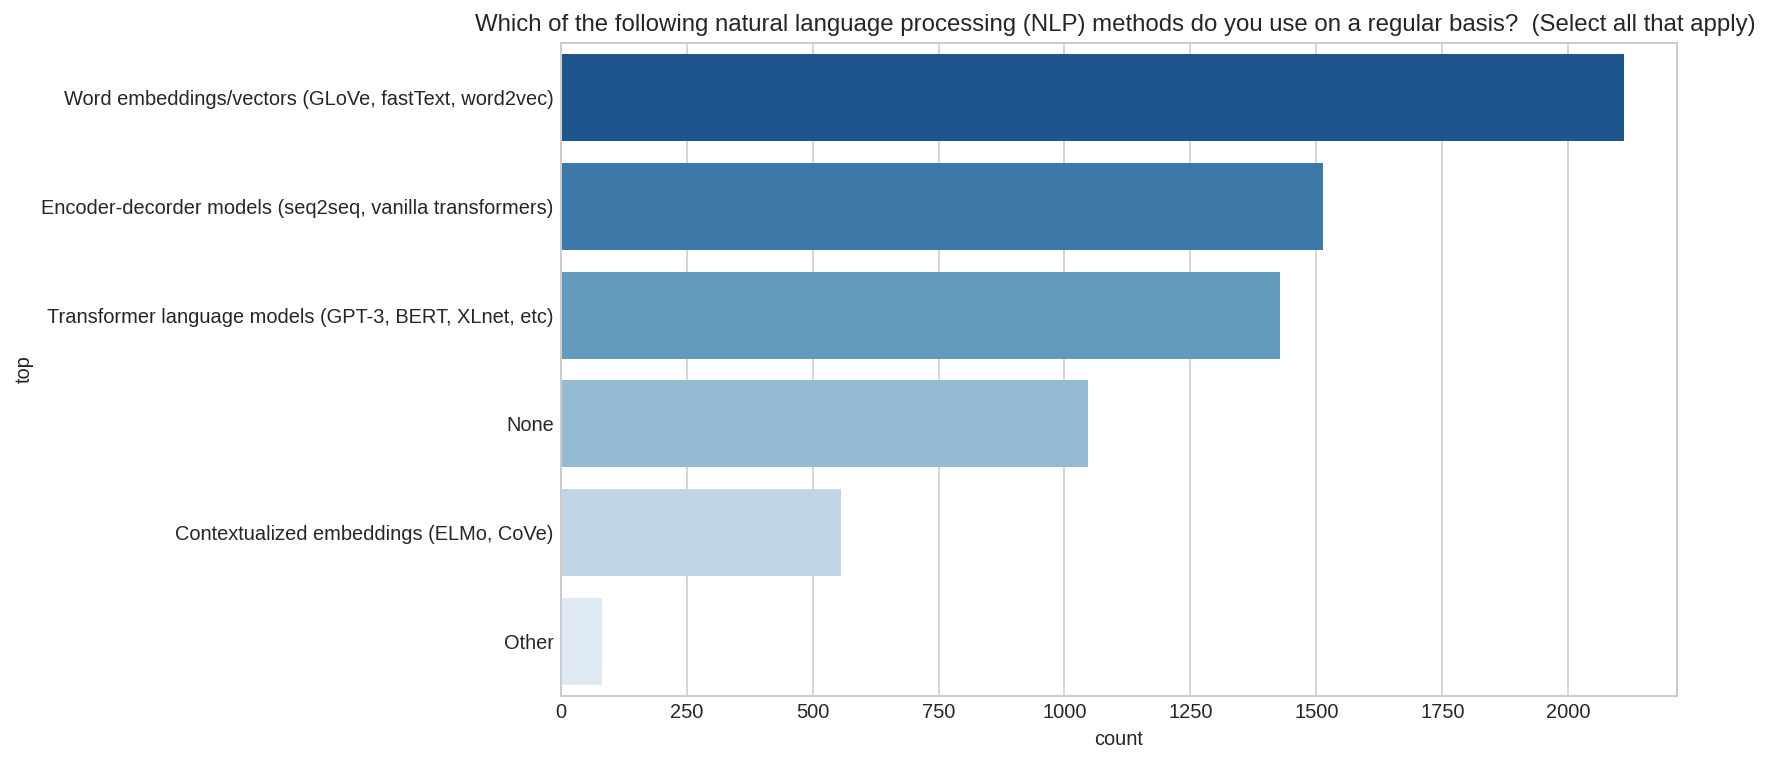

In [109]:
show_plot_by_qno("Q19")

## Q20 🏢 What is the size of the company where you are employed?

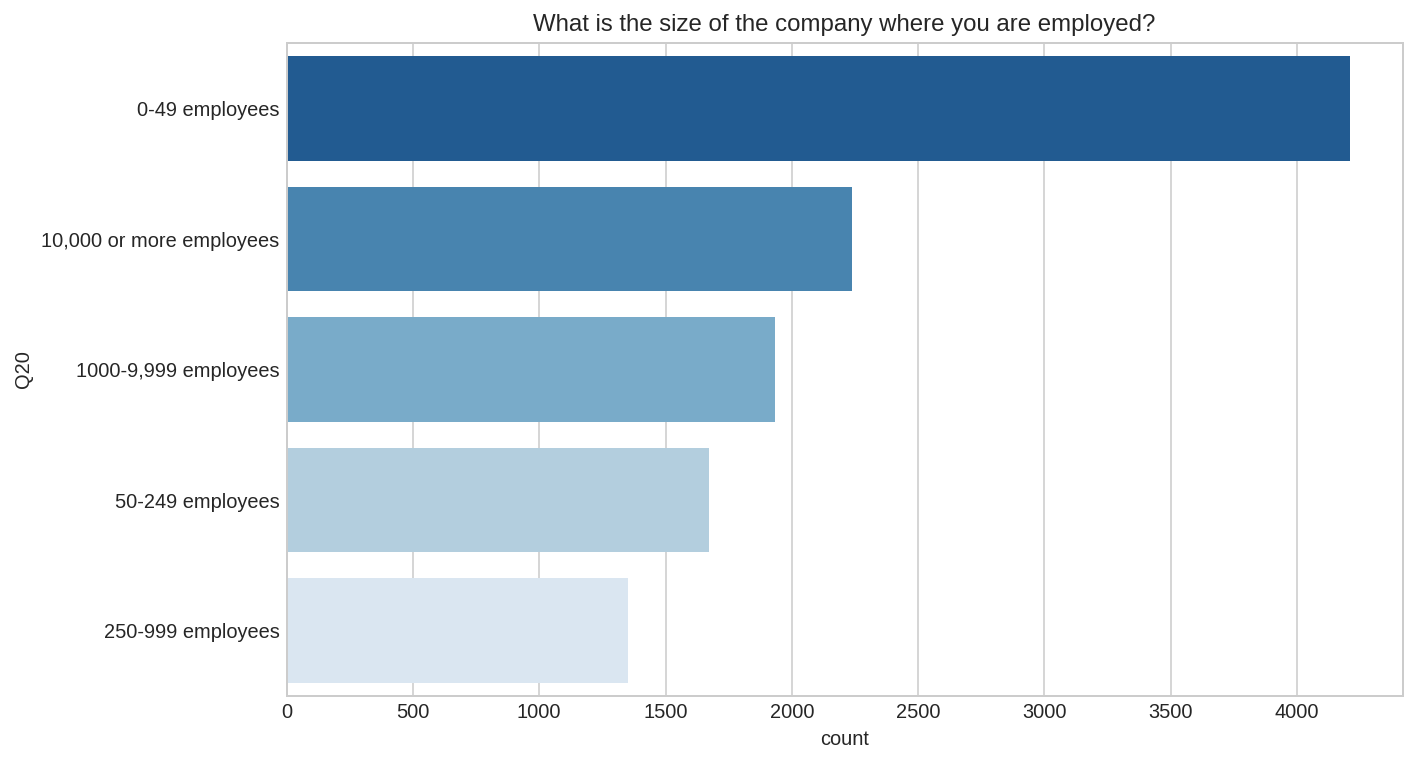

In [110]:
show_plot_by_qno("Q20")

## Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

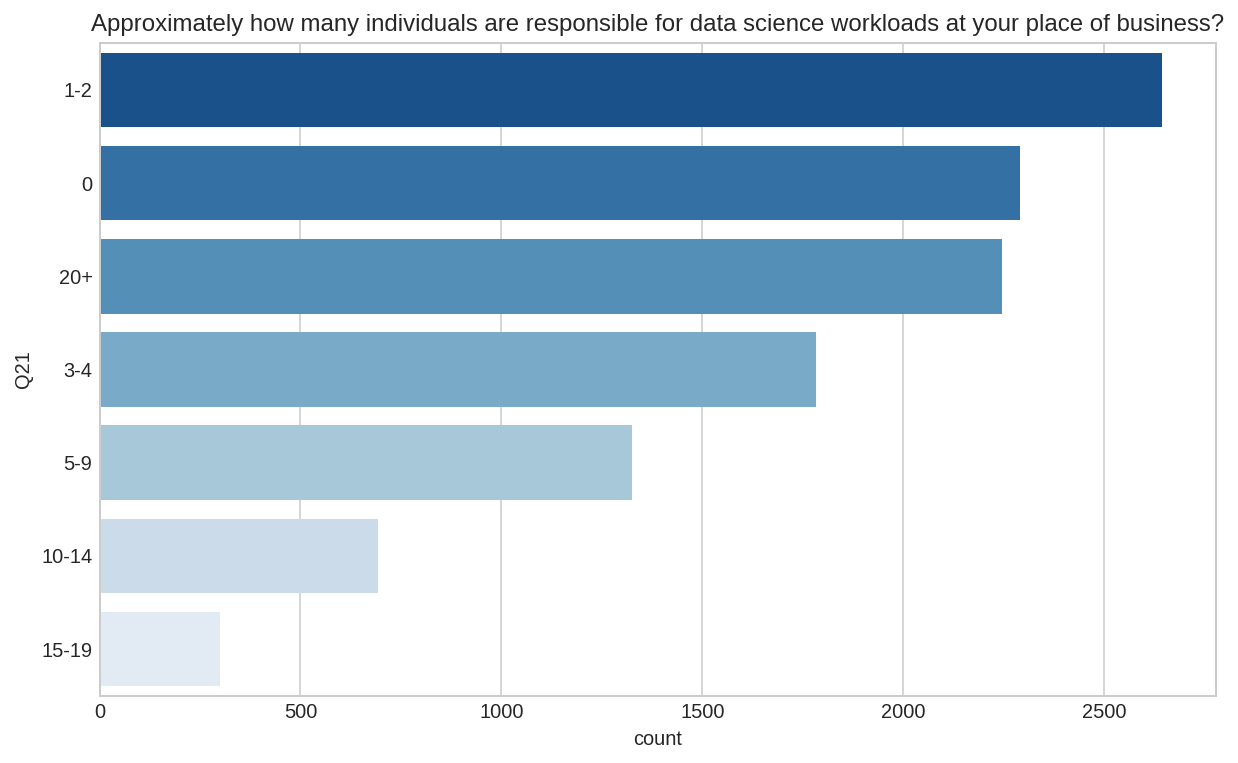

In [111]:
show_plot_by_qno("Q21")

## Q22 Does your current employer incorporate machine learning methods into their business?

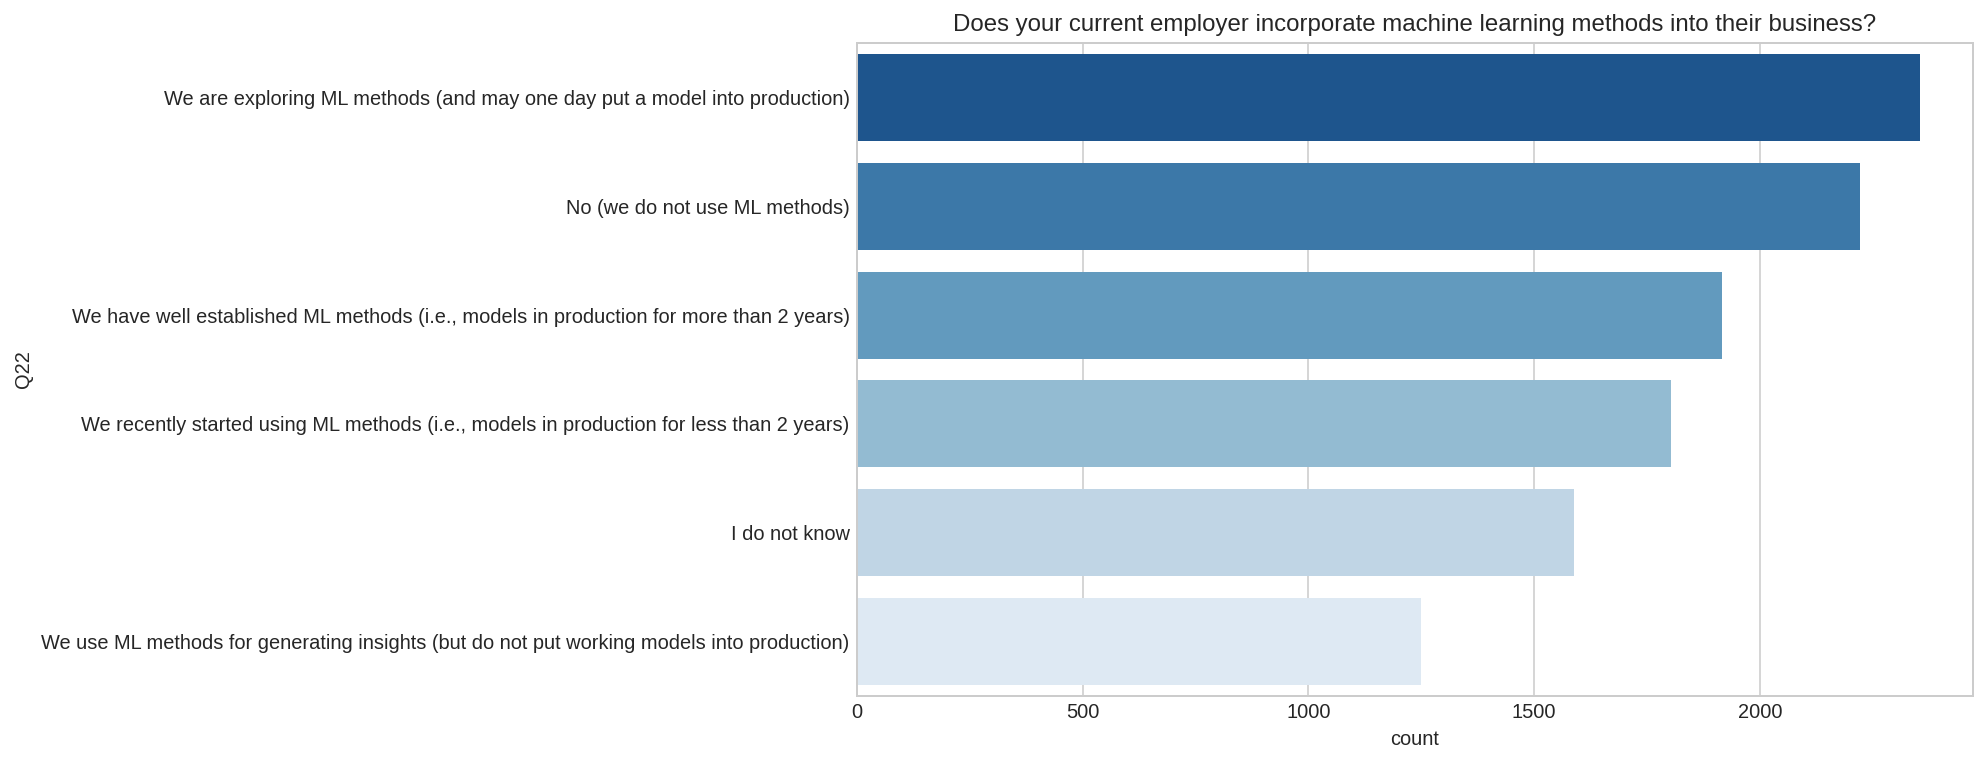

In [112]:
show_plot_by_qno("Q22")

## Q23 Select any activities that make up an important part of your role at work: (Select all that apply) 

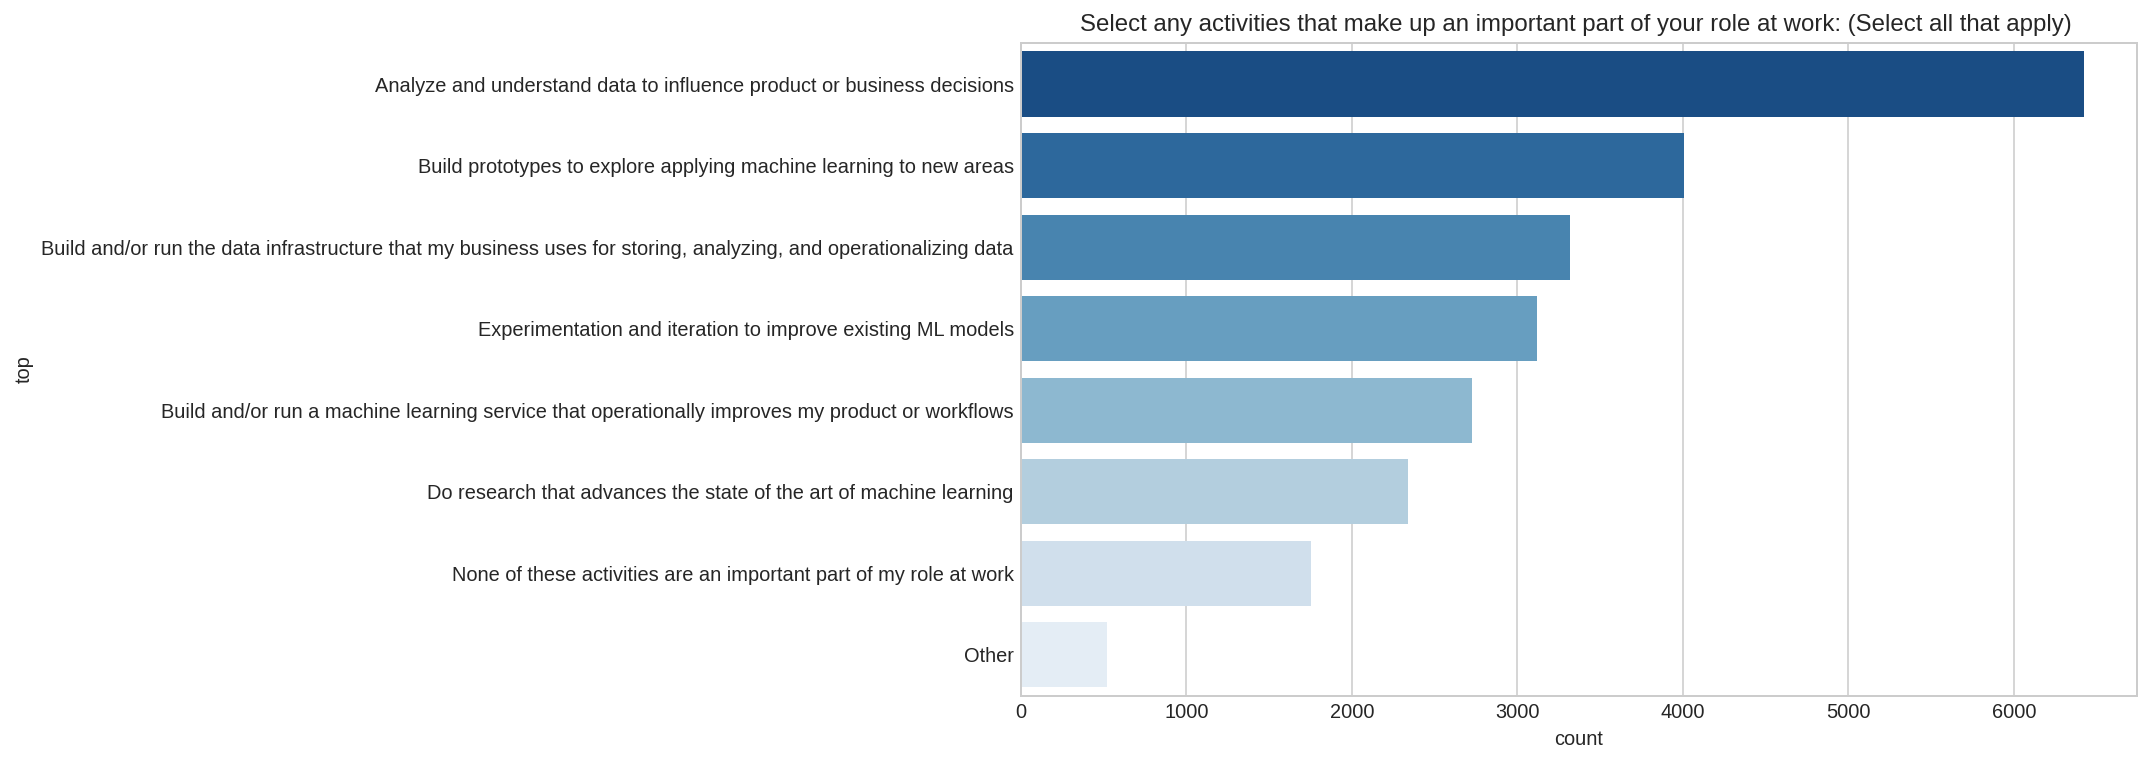

In [113]:
show_plot_by_qno("Q23")

## Q24 What is your current yearly compensation (approximate $USD)

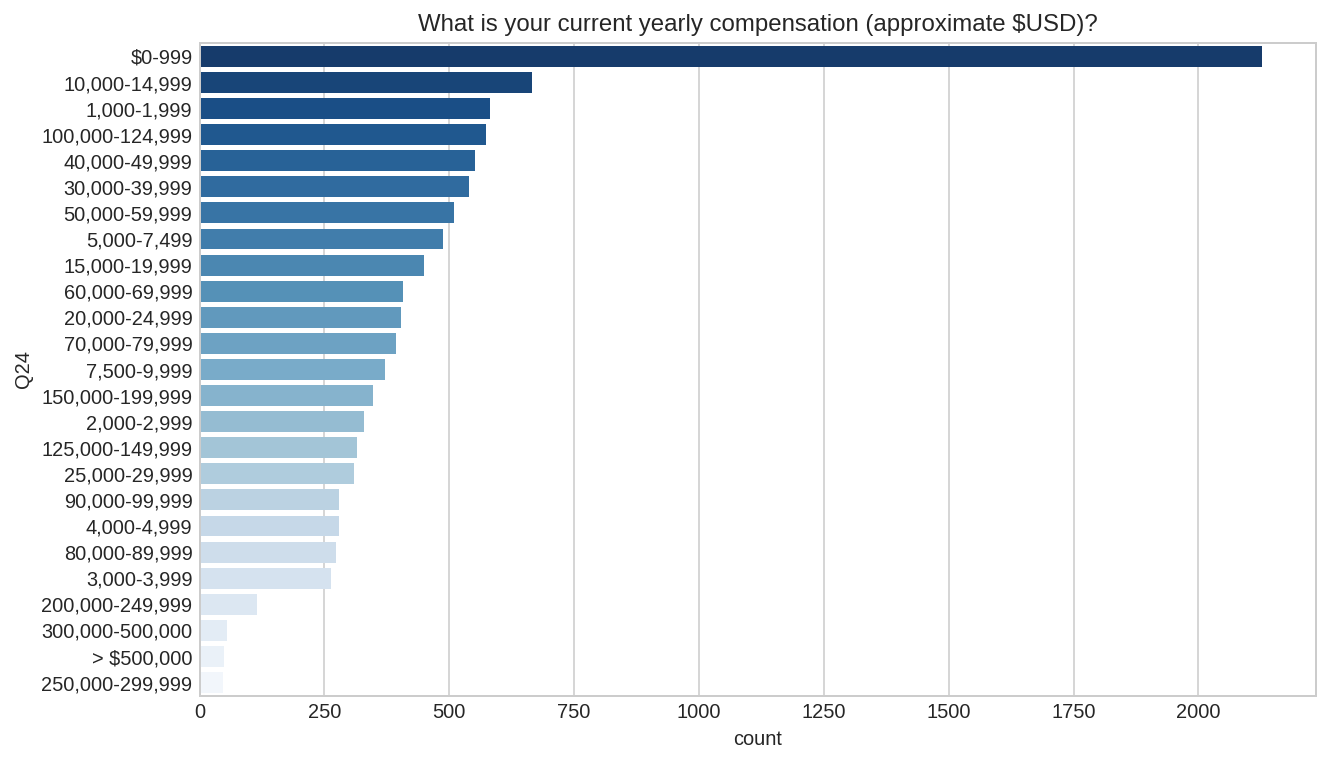

In [114]:
show_plot_by_qno("Q24")

In [115]:
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count

,range,count
0,$0-999,2128
1,"10,000-14,999",665
2,"1,000-1,999",581
3,"100,000-124,999",573
4,"40,000-49,999",552
5,"30,000-39,999",540
6,"50,000-59,999",510
7,"5,000-7,499",488
8,"15,000-19,999",449
9,"60,000-69,999",408


In [116]:
# order by number
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]
q24_count["min"] = q24_count["min"].str.replace(",|\$|>", "").astype(int)
q24_count = q24_count.sort_values("min")
q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


In [ ]:
plt.figure(figsize=(10, 6))
g = sns.barplot(data=q24_count, 
                y="range", x="count", 
                palette="Blues").set_title(get_question_title_by_qno("Q24"))

In [ ]:
q24_cols = q24_count.range.tolist()

In [ ]:
q3_usa = answer[answer["Q3"].isin(["United States of America"])]
plt.figure(figsize=(10, 6))
g= sns.countplot(data=q3_usa, 
              y="Q24", 
              order=q24_cols, 
              palette="Blues").set_title("USA yearly compensation")

In [ ]:
q3_korea = answer[answer["Q3"].isin(["South Korea"])]
plt.figure(figsize=(10, 6))
g = sns.countplot(data=q3_korea, 
                  y="Q24", 
                  order=q24_cols, 
                  palette="Blues").set_title("South Korea yearly compensation")

## Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

In [ ]:
show_plot_by_qno("Q25")

## Q26 cloud computing platforms
### Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

In [ ]:
show_plot_by_qno("Q26_A")

### Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

In [ ]:
show_plot_by_qno("Q26_B")

## Q27 cloud computing products

### Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

In [ ]:
show_plot_by_qno("Q27_A")

### Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

In [ ]:
show_plot_by_qno("Q27_B")

## Q28 machine learning products 
### Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

In [ ]:
show_plot_by_qno("Q28_A")

### Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply) 

In [ ]:
show_plot_by_qno("Q28_B")

## Q29  big data products

### Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) 

In [ ]:
show_plot_by_qno("Q29_A")

### Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [ ]:
show_plot_by_qno("Q29_B")

## Q30 Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice

In [ ]:
show_plot_by_qno("Q30")

## Q31 business intelligence tools

### Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

In [ ]:
show_plot_by_qno("Q31_A")

### Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

In [ ]:
show_plot_by_qno("Q31_B")

## Q32 Which of the following business intelligence tools do you use most often? - Selected Choice

In [ ]:
show_plot_by_qno("Q32")

## Q33 automated machine learning tools (or partial AutoML tools)
### Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)

In [ ]:
show_plot_by_qno("Q33_A")

### Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

In [ ]:
show_plot_by_qno("Q33_B")

## Q34 automated machine learning tools (or partial AutoML tools)
### Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) 

In [ ]:
show_plot_by_qno("Q34_A")

### Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

In [ ]:
show_plot_by_qno("Q34_B")

## Q35 Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [ ]:
show_plot_by_qno("Q35_A")

In [ ]:
show_plot_by_qno("Q35_B")

## Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

In [ ]:
show_plot_by_qno("Q36")

## Q37 On which platforms have you begun or completed data science courses? (Select all that apply)

In [ ]:
show_plot_by_qno("Q37")

## Q38 What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

In [ ]:
show_plot_by_qno("Q38")

## Q39 Who/what are your favorite media sources that report on data science topics? (Select all that apply) 

In [ ]:
show_plot_by_qno("Q39")